In [21]:
import sys
from pathlib import Path
import pandas as pd

# Notebook cell
%load_ext autoreload
%autoreload 2

# Get root directory (assuming notebook is in root/notebooks/)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR

# Add src directory to Python path
sys.path.append(str(ROOT_DIR / 'src'))

# Verify path
print(f"Python will look in these locations:\n{sys.path}")


# --- Execute the processor ---
import utils
from config import date_str, DOWNLOAD_DIR, DEST_DIR

path_data = f'..\data\{date_str}_df_finviz_merged.parquet'

path_corr = f'..\data\{date_str}_df_corr_matrix.parquet'
path_cov = f'..\data\{date_str}_df_cov_matrix.parquet'
path_output = f'..\picks\{date_str}_portf.txt'

path_corr_emv = f'..\data\{date_str}_df_corr_emv_matrix.parquet'
path_cov_emv = f'..\data\{date_str}_df_cov_emv_matrix.parquet'
path_output_emv = f'..\picks\{date_str}_portf_emv.txt'

print(utils.__file__)  # Should point to your src/utils.py
print(f'path_data: {path_data}')
print(f'path_corr: {path_corr}')
print(f'path_cov: {path_cov}')  
print(f'path_output: {path_output}')
print(f'path_corr_emv: {path_corr_emv}')
print(f'path_cov_emv: {path_cov_emv}')
print(f'path_output_emv: {path_output_emv}')
print((f'date_str: {date_str}'))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python will look in these locations:
['C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\python311.zip', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\DLLs', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\Lib', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv', '', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\setuptools\\_vendor', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src']
c:\Users\ping\Files_win10

In [22]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
pd.set_option('display.width', 1000)        # Let the display adjust to the window
# pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 200)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [23]:
import pandas as pd

def get_column_values_above_threshold(df, column_name='Avg Volume, M', threshold=1):
  """
  Analyzes the number and percentage of values in a DataFrame column that are above a specified threshold,
  and returns the filtered DataFrame.

  Args:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze. Defaults to 'Avg Volume, M'.
    threshold (float): The threshold value to compare against. Defaults to 1.00.

  Returns:
    pd.DataFrame: A DataFrame containing only the rows where the specified column's value is above the threshold.
  """
  
  count_before = len(df)
  above_threshold_df = df[df[column_name] > threshold]
  count_after = len(above_threshold_df)
  percentage = (count_after / len(df)) * 100

  print(f"count_before: {count_before}")
  print(f"count_after above threshold ({threshold}): {count_after}")
  print(f"Percentage above threshold ({threshold}): {percentage:.2f}%")

  return above_threshold_df


In [24]:
df_data = pd.read_parquet(path_data)
df_data 

,Company,Info,"MktCap, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,All-Time High %,All-Time Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Dividend %,Fwd P/E,P/S,P/B,P/FCF,ROE %,Debt/Eq,Oper M %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",3130150.0000,1.2800,51.3800,-16.7900,7.8743,7.2600,-6.8700,-6.8400,-11.8900,25.6500,3.0100,-5.0800,-8.5000,-16.6500,23.1400,-19.8900,25.3700,-19.8900,327443.3400,9.7000,4.6552,2.5400,4.9500,47.0682,61.2700,0.7700,208.3700,1.8400,0.5000,26.1900,7.9100,46.9500,31.8400,136.5200,1.4500,31.7600,80.6701,9957.0310,888.0428,9.6300,23.0568,3.9049,6.2602,11.1003,2.5127,0.8612,1.5845,1.1613,0.1840,0.2850,1.0358,-0.9594,-1.3857,0.8283,-0.4254,-0.6087,0.9178,0.6840,1.0178,1.1436
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2879180.0000,0.9800,53.8800,-8.1100,7.8470,4.2200,-1.9900,-13.3000,-7.5200,-3.4100,3.0700,-0.0700,-6.8300,-7.6300,12.3300,-17.3100,12.3300,-17.3100,485977.5600,12.9600,3.3462,2.4400,3.5100,22.1123,25.2500,0.8800,387.3000,3.4500,0.8400,26.0500,11.0000,9.5100,41.1100,34.2900,0.3400,44.9600,44.4284,9957.0310,888.0428,8.2031,17.5381,3.2096,1.2219,1.8995,1.2080,1.3725,2.8900,1.2826,0.5617,1.0440,1.1112,-1.5374,-2.2744,0.7455,-0.7315,-1.0429,0.8716,-0.1273,-0.1783,0.9771
NVDA,NVIDIA Corp,"Technology, Semiconductors",2596890.0000,2.1100,48.2400,-20.7500,9.8235,1.8600,-11.8200,-27.7100,-25.9400,33.8400,1.0400,-7.9700,-15.3100,-25.8000,22.8700,-30.5000,36.0600,-30.5000,319189.9800,6.8700,6.4549,3.5400,6.4400,217.5547,315.2700,0.6900,106.4300,3.6200,0.0400,18.8900,19.9000,32.8400,42.6700,119.1800,0.1300,62.4200,347.0916,9957.0310,888.0428,5.0026,8.6786,2.0934,-0.2734,-0.3631,0.9587,1.1871,2.2707,1.2373,-0.5525,-0.9010,0.9046,-0.6254,-0.9094,0.8976,-0.6372,-0.8691,0.8943,0.6602,0.9563,1.1190
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",1979630.0000,1.3000,50.4600,-14.9700,11.4870,7.0000,-9.3200,-20.7600,-1.3400,5.2500,2.4600,-5.4800,-6.3900,-20.0900,15.5900,-23.0800,23.0400,-23.0800,284151.4300,9.4800,5.0820,3.4200,5.2500,41.9393,49.4300,0.8500,186.5400,3.2900,NaN,24.9900,3.1000,6.9100,60.2100,24.2900,0.5200,10.8700,85.0378,9957.0310,888.0428,9.2623,20.4775,3.5799,1.8775,3.3802,1.3110,1.3845,2.7160,1.2522,-0.3348,-0.5044,0.9443,-2.0411,-2.8035,0.7029,-0.0803,-0.1169,0.9864,0.2643,0.3748,1.0472
GOOGL,Alphabet Inc,"Communication Services, Internet Content & Inf...",1954980.0000,1.0000,51.7200,-15.8600,7.8621,3.8800,-6.6100,-19.5500,-2.9200,1.9200,3.5800,-3.2500,-7.6200,-14.8000,13.3400,-23.0700,13.3400,-23.0700,6533.0100,5.8600,3.6791,2.6800,3.8400,42.6839,35.0800,1.2200,159.2800,2.5300,0.3100,15.9000,5.5900,5.9800,26.8700,32.9100,0.0900,32.4600,1786.4239,9957.0310,888.0428,8.6365,18.0698,3.2766,3.2829,5.9107,1.5669,1.9599,4.0045,1.3816,-0.2670,-0.4194,0.9573,-2.0078,-2.6746,0.7181,-0.4415,-0.6298,0.9290,0.1135,0.1640,1.0201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HR,Healthcare Realty Trust Inc,"Real Estate, REIT - Healthcare Facilities",5520.0000,0.9100,44.6300,-7.2000,0.9628,0.1900,-5.0700,-5.9200,-11.7300,10.5400,-1.5400,-4.0400,-8.6100,-9.1300,8.2600,-16.7700,12.8400,-45.8400,23.1800,0.4600,2.9243,2.2500,3.1200,1.1226,2.6500,0.4200,15.7300,0.0600,7.8800,NaN,4.3500,1.0500,11.0100,-10.9500,0.9900,2.8700,-8.8102,-9.8721,0.1205,-4.1835,-5.1165,0.4332,3

In [25]:
df_data = pd.read_parquet(path_data)

# liquidity filter, Avg Volume, M > 0.75M
df_data = get_column_values_above_threshold(df_data, column_name='Avg Volume, M', threshold=0.75)

# Drop specified columns with NaNs in df_data
df_data = df_data.drop(['All-Time High %', 'All-Time Low %', 'Dividend %'], axis=1)

df_corr = pd.read_parquet(path_corr)
df_cov = pd.read_parquet(path_cov)

print(f'\ndf_cov.shape: {df_cov.shape}')
display(df_cov.head())

print(f'\ndf_corr.shape: {df_corr.shape}')
display(df_corr.head())

print(f'\ndf_data.shape: {df_data.shape}')
display(df_data.head())
display((df_data.describe()))

count_before: 1136
count_after above threshold (0.75): 927
Percentage above threshold (0.75): 81.60%

df_cov.shape: (1136, 1136)


Symbol,A,AA,AAL,AAON,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,ACI,ACM,ACN,ADBE,ADC,ADI,ADM,ADP,ADSK,ADT,AEE,AEG,AEM,AEP,AER,AES,AFG,AFL,AFRM,AGCO,AGI,AGNC,AIG,AIT,AIZ,AJG,AKAM,ALAB,ALB,ALC,ALGN,ALL,ALLE,ALLY,ALNY,ALSN,ALV,AM,AMAT,AMCR,AMD,AME,AMGN,AMH,AMP,AMT,AMX,AMZN,AN,ANET,ANSS,AON,AOS,APA,APD,APG,APH,APO,APP,APPF,APTV,AR,ARCC,ARE,ARES,ARGX,ARM,ARMK,ARW,AS,ASML,ASND,ASR,ASTS,ASX,ATI,ATO,ATR,AU,AUR,AVB,AVGO,AVTR,AVY,AWI,AWK,AXON,AXP,AXS,AXTA,AYI,AZN,AZO,BA,BABA,BAC,BAH,BALL,BAM,BAP,BAX,BBD,BBIO,BBVA,BBWI,BBY,BCE,BCH,BCS,BDX,BECN,BEKE,BEN,BEP,BERY,BF-A,BF-B,BFAM,BG,BHP,BIDU,BIIB,BILI,BIO,BIP,BIRK,BJ,BK,BKNG,BKR,BLD,BLDR,BLK,BMA,BMI,BMO,BMRN,BMY,BN,BNS,BNT,BNTX,BOKF,BP,BPMC,BPOP,BR,BRBR,BRFS,BRK-A,BRK-B,BRKR,BRO,BROS,BRX,BSAC,BSBR,BSX,BSY,BTI,BUD,BURL,BWA,BWXT,BX,BXP,BXSL,C,CACC,CACI,CAE,CAG,CAH,CARR,CART,CASY,CAT,CAVA,CB,CBOE,CBRE,CBSH,CCCS,CCEP,CCI,CCJ,CCK,CCL,CDNS,CDP,CDW,CEF,CEG,CELH,CF,CFG,CFLT,CFR,CG,CHD,CHDN,CHE,CHH,CHKP,CHRD,CHRW,CHT,CHTR,CHWY,CI,CIEN,CIGI,CINF,CL,CLH,CLS,CLX,CM,CMA,CMCSA,CME,CMG,CMI,CMS,CNA,CNC,CNH,CNI,CNM,CNP,CNQ,COF,COHR,COIN,COKE,COLD,COO,COOP,COP,COR,CORT,COST,CP,CPAY,CPB,CPNG,CPRT,CPT,CQP,CR,CRBG,CRDO,CRH,CRL,CRM,CROX,CRS,CRVL,CRWD,CSCO,CSGP,CSL,CSX,CTAS,CTRA,CTSH,CTVA,CUBE,CVE,CVLT,CVNA,CVS,CVX,CW,CWAN,CWEN,CWEN-A,CWST,CX,CYBR,CZR,D,DAL,DASH,DAY,DB,DBX,DCI,DD,DDOG,DE,DECK,DELL,DEO,DFS,DG,DGX,DHI,DHR,DINO,DIS,DJT,DKNG,DKS,DLB,DLR,DLTR,DOC,DOCS,DOCU,DOV,DOW,DOX,DPZ,DRI,DRS,DSGX,DT,DTE,DTM,DUK,DUOL,DVA,DVN,DXCM,E,EA,EAT,EBAY,EBR,EC,ECL,ED,EDU,EFX,EGP,EHC,EIX,EL,ELS,ELV,EME,EMN,EMR,ENB,ENPH,ENSG,ENTG,EOG,EPAM,EPD,EPRT,EQH,EQIX,EQNR,EQR,EQT,ERIC,ERIE,ERJ,ES,ESAB,ESLT,ESNT,ESS,ESTC,ET,ETN,ETR,EVR,EVRG,EW,EWBC,EXAS,EXC,EXE,EXEL,EXLS,EXP,EXPD,EXPE,EXR,F,FAF,FANG,FAST,FBIN,FCFS,FCN,FCNCA,FCX,FDS,FDX,FE,FERG,FFIV,FHN,FI,FICO,FIS,FITB,FIX,FLEX,FLR,FLS,FLUT,FMS,FMX,FN,FND,FNF,FNV,FOUR,FOX,FOXA,FR,FRHC,FRT,FSK,FSLR,FSV,FTAI,FTI,FTNT,FTS,FTV,FUTU,FWONA,FWONK,FYBR,G,GAP,GD,GDDY,GE,GEHC,GEN,GEV,GFI,GFL,GFS,GGAL,GGG,GH,GIB,GIL,GILD,GIS,GL,GLBE,GLPI,GLW,GM,GMAB,GME,GMED,GNRC,GOLD,GOOG,GOOGL,GPC,GPK,GPN,GRAB,GRMN,GS,GSK,GTLB,GTLS,GWRE,GWW,H,HAL,HALO,HAS,HBAN,HCA,HD,HDB,HEI,HEI-A,HES,HESM,HIG,HII,HIMS,HLI,HLN,HLNE,HLT,HMC,HMY,HOLX,HOMB,HON,HOOD,HPE,HPQ,HQY,HR,HRB,HRL,HSBC,HSIC,HST,HSY,HTHT,HUBB,HUBS,HUM,HWM,IBKR,IBM,IBN,ICE,ICL,ICLR,IDA,IDXX,IEX,IFF,IHG,ILMN,IMO,INCY,INFA,INFY,ING,INGR,INSM,INTC,INTU,INVH,IONQ,IOT,IP,IPG,IQV,IR,IRM,ISRG,IT,ITT,ITUB,ITW,IVZ,IX,J,JAZZ,JBHT,JBL,JCI,JD,JEF,JHX,JKHY,JLL,JNJ,JNPR,JPM,JXN,K,KB,KBR,KD,KDP,KEP,KEX,KEY,KEYS,KGC,KHC,KIM,KKR,KLAC,KMB,KMI,KMX,KNSL,KNTK,KNX,KO,KR,KSPI,KT,KVYO,L,LAD,LAMR,LBRDA,LBRDK,LCID,LDOS,LECO,LEGN,LEN,LEVI,LH,LHX,LI,LII,LIN,LKQ,LLY,LLYVA,LLYVK,LMT,LNG,LNT,LNTH,LNW,LOAR,LOGI,LOW,LPLA,LPX,LRCX,LRN,LSCC,LTH,LULU,LUV,LVS,LW,LYB,LYG,LYV,MA,MAA,MANH,MAR,MAS,MASI,MBLY,MCD,MCHP,MCK,MCO,MDB,MDGL,MDLZ,MDT,MEDP,MELI,MET,META,MFC,MFG,MGA,MGM,MHK,MIDD,MKC,MKL,MKTX,MLI,MLM,MMC,MMM,MMSI,MMYT,MNDY,MNST,MO,MOH,MORN,MOS,MPC,MPLX,MPWR,MRK,MRNA,MRVL,MS,MSA,MSCI,MSFT,MSI,MSTR,MT,MTB,MTCH,MTD,MTG,MTSI,MTZ,MU,MUFG,MUSA,NBIX,NCLH,NDAQ,NDSN,NEE,NEM,NET,NEU,NFG,NFLX,NGG,NI,NICE,NIO,NKE,NLY,NMR,NNN,NOC,NOK,NOW,NRG,NSC,NTAP,NTES,NTNX,NTR,NTRA,NTRS,NU,NUE,NVDA,NVMI,NVO,NVR,NVS,NVT,NWG,NWS,NWSA,NXPI,NXT,NYT,O,OBDC,OC,ODFL,OGE,OHI,OKE,OKTA,OLLI,OMC,OMF,ON,ONB,ONC,ONON,ONTO,ORCL,ORI,ORLY,OSK,OTEX,OTIS,OVV,OWL,OXY,PAA,PAAS,PAC,PAG,PAGP,PANW,PARA,PATH,PAYC,PAYX,PB,PBA,PBR,PBR-A,PCAR,PCOR,PCTY,PDD,PDI,PEG,PEGA,PEN,PEP,PFE,PFG,PFGC,PG,PGR,PH,PHG,PHM,PHYS,PINS,PKG,PKX,PLD,PLNT,PLTR,PM,PNC,PNFP,PNR,PNW,PODD,POOL,POST,PPC,PPG,PPL,PR,PRI,PRMB,PRU,PSA,PSLV,PSN,PSO,PSTG,PSX,PTC,PUK,PYPL,QCOM,QGEN,QRVO,QSR,QXO,R,RACE,RBA,RBC,RBLX,RBRK,RCI,RCL,RDDT,RDY,REG,REGN,RELX,REXR,RF,RGA,RGEN,RGLD,RIO,RITM,RIVN,RJF,RKLB,RKT,RL,RLI,RMD,RNR,ROIV,ROK,ROKU,ROL,ROP,ROST,RPM,RPRX,RRC,RRX,RS,RSG,RTO,RTX,RVMD,RVTY,RY,RYAAY,RYAN,S,SAIA,SAIC,SAN,SAP,SATS,SBAC,SBS,SBUX,SCCO,SCHW,SCI,SE,SEIC,SF,SFM,SGI,SHEL,SHG,SHOP,SHW,SIRI,SJM,SKM,SKX,SLB,SLF,SLGN,SLM,SMCI,SMMT,SN,SNA,SNAP,SNN,SNOW,SNPS,SNV,SNX,SNY,SO,SOFI,SOLV,SONY,SPG,SPGI,SPOT,SP


df_corr.shape: (1136, 1136)


Symbol,A,AA,AAL,AAON,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,ACI,ACM,ACN,ADBE,ADC,ADI,ADM,ADP,ADSK,ADT,AEE,AEG,AEM,AEP,AER,AES,AFG,AFL,AFRM,AGCO,AGI,AGNC,AIG,AIT,AIZ,AJG,AKAM,ALAB,ALB,ALC,ALGN,ALL,ALLE,ALLY,ALNY,ALSN,ALV,AM,AMAT,AMCR,AMD,AME,AMGN,AMH,AMP,AMT,AMX,AMZN,AN,ANET,ANSS,AON,AOS,APA,APD,APG,APH,APO,APP,APPF,APTV,AR,ARCC,ARE,ARES,ARGX,ARM,ARMK,ARW,AS,ASML,ASND,ASR,ASTS,ASX,ATI,ATO,ATR,AU,AUR,AVB,AVGO,AVTR,AVY,AWI,AWK,AXON,AXP,AXS,AXTA,AYI,AZN,AZO,BA,BABA,BAC,BAH,BALL,BAM,BAP,BAX,BBD,BBIO,BBVA,BBWI,BBY,BCE,BCH,BCS,BDX,BECN,BEKE,BEN,BEP,BERY,BF-A,BF-B,BFAM,BG,BHP,BIDU,BIIB,BILI,BIO,BIP,BIRK,BJ,BK,BKNG,BKR,BLD,BLDR,BLK,BMA,BMI,BMO,BMRN,BMY,BN,BNS,BNT,BNTX,BOKF,BP,BPMC,BPOP,BR,BRBR,BRFS,BRK-A,BRK-B,BRKR,BRO,BROS,BRX,BSAC,BSBR,BSX,BSY,BTI,BUD,BURL,BWA,BWXT,BX,BXP,BXSL,C,CACC,CACI,CAE,CAG,CAH,CARR,CART,CASY,CAT,CAVA,CB,CBOE,CBRE,CBSH,CCCS,CCEP,CCI,CCJ,CCK,CCL,CDNS,CDP,CDW,CEF,CEG,CELH,CF,CFG,CFLT,CFR,CG,CHD,CHDN,CHE,CHH,CHKP,CHRD,CHRW,CHT,CHTR,CHWY,CI,CIEN,CIGI,CINF,CL,CLH,CLS,CLX,CM,CMA,CMCSA,CME,CMG,CMI,CMS,CNA,CNC,CNH,CNI,CNM,CNP,CNQ,COF,COHR,COIN,COKE,COLD,COO,COOP,COP,COR,CORT,COST,CP,CPAY,CPB,CPNG,CPRT,CPT,CQP,CR,CRBG,CRDO,CRH,CRL,CRM,CROX,CRS,CRVL,CRWD,CSCO,CSGP,CSL,CSX,CTAS,CTRA,CTSH,CTVA,CUBE,CVE,CVLT,CVNA,CVS,CVX,CW,CWAN,CWEN,CWEN-A,CWST,CX,CYBR,CZR,D,DAL,DASH,DAY,DB,DBX,DCI,DD,DDOG,DE,DECK,DELL,DEO,DFS,DG,DGX,DHI,DHR,DINO,DIS,DJT,DKNG,DKS,DLB,DLR,DLTR,DOC,DOCS,DOCU,DOV,DOW,DOX,DPZ,DRI,DRS,DSGX,DT,DTE,DTM,DUK,DUOL,DVA,DVN,DXCM,E,EA,EAT,EBAY,EBR,EC,ECL,ED,EDU,EFX,EGP,EHC,EIX,EL,ELS,ELV,EME,EMN,EMR,ENB,ENPH,ENSG,ENTG,EOG,EPAM,EPD,EPRT,EQH,EQIX,EQNR,EQR,EQT,ERIC,ERIE,ERJ,ES,ESAB,ESLT,ESNT,ESS,ESTC,ET,ETN,ETR,EVR,EVRG,EW,EWBC,EXAS,EXC,EXE,EXEL,EXLS,EXP,EXPD,EXPE,EXR,F,FAF,FANG,FAST,FBIN,FCFS,FCN,FCNCA,FCX,FDS,FDX,FE,FERG,FFIV,FHN,FI,FICO,FIS,FITB,FIX,FLEX,FLR,FLS,FLUT,FMS,FMX,FN,FND,FNF,FNV,FOUR,FOX,FOXA,FR,FRHC,FRT,FSK,FSLR,FSV,FTAI,FTI,FTNT,FTS,FTV,FUTU,FWONA,FWONK,FYBR,G,GAP,GD,GDDY,GE,GEHC,GEN,GEV,GFI,GFL,GFS,GGAL,GGG,GH,GIB,GIL,GILD,GIS,GL,GLBE,GLPI,GLW,GM,GMAB,GME,GMED,GNRC,GOLD,GOOG,GOOGL,GPC,GPK,GPN,GRAB,GRMN,GS,GSK,GTLB,GTLS,GWRE,GWW,H,HAL,HALO,HAS,HBAN,HCA,HD,HDB,HEI,HEI-A,HES,HESM,HIG,HII,HIMS,HLI,HLN,HLNE,HLT,HMC,HMY,HOLX,HOMB,HON,HOOD,HPE,HPQ,HQY,HR,HRB,HRL,HSBC,HSIC,HST,HSY,HTHT,HUBB,HUBS,HUM,HWM,IBKR,IBM,IBN,ICE,ICL,ICLR,IDA,IDXX,IEX,IFF,IHG,ILMN,IMO,INCY,INFA,INFY,ING,INGR,INSM,INTC,INTU,INVH,IONQ,IOT,IP,IPG,IQV,IR,IRM,ISRG,IT,ITT,ITUB,ITW,IVZ,IX,J,JAZZ,JBHT,JBL,JCI,JD,JEF,JHX,JKHY,JLL,JNJ,JNPR,JPM,JXN,K,KB,KBR,KD,KDP,KEP,KEX,KEY,KEYS,KGC,KHC,KIM,KKR,KLAC,KMB,KMI,KMX,KNSL,KNTK,KNX,KO,KR,KSPI,KT,KVYO,L,LAD,LAMR,LBRDA,LBRDK,LCID,LDOS,LECO,LEGN,LEN,LEVI,LH,LHX,LI,LII,LIN,LKQ,LLY,LLYVA,LLYVK,LMT,LNG,LNT,LNTH,LNW,LOAR,LOGI,LOW,LPLA,LPX,LRCX,LRN,LSCC,LTH,LULU,LUV,LVS,LW,LYB,LYG,LYV,MA,MAA,MANH,MAR,MAS,MASI,MBLY,MCD,MCHP,MCK,MCO,MDB,MDGL,MDLZ,MDT,MEDP,MELI,MET,META,MFC,MFG,MGA,MGM,MHK,MIDD,MKC,MKL,MKTX,MLI,MLM,MMC,MMM,MMSI,MMYT,MNDY,MNST,MO,MOH,MORN,MOS,MPC,MPLX,MPWR,MRK,MRNA,MRVL,MS,MSA,MSCI,MSFT,MSI,MSTR,MT,MTB,MTCH,MTD,MTG,MTSI,MTZ,MU,MUFG,MUSA,NBIX,NCLH,NDAQ,NDSN,NEE,NEM,NET,NEU,NFG,NFLX,NGG,NI,NICE,NIO,NKE,NLY,NMR,NNN,NOC,NOK,NOW,NRG,NSC,NTAP,NTES,NTNX,NTR,NTRA,NTRS,NU,NUE,NVDA,NVMI,NVO,NVR,NVS,NVT,NWG,NWS,NWSA,NXPI,NXT,NYT,O,OBDC,OC,ODFL,OGE,OHI,OKE,OKTA,OLLI,OMC,OMF,ON,ONB,ONC,ONON,ONTO,ORCL,ORI,ORLY,OSK,OTEX,OTIS,OVV,OWL,OXY,PAA,PAAS,PAC,PAG,PAGP,PANW,PARA,PATH,PAYC,PAYX,PB,PBA,PBR,PBR-A,PCAR,PCOR,PCTY,PDD,PDI,PEG,PEGA,PEN,PEP,PFE,PFG,PFGC,PG,PGR,PH,PHG,PHM,PHYS,PINS,PKG,PKX,PLD,PLNT,PLTR,PM,PNC,PNFP,PNR,PNW,PODD,POOL,POST,PPC,PPG,PPL,PR,PRI,PRMB,PRU,PSA,PSLV,PSN,PSO,PSTG,PSX,PTC,PUK,PYPL,QCOM,QGEN,QRVO,QSR,QXO,R,RACE,RBA,RBC,RBLX,RBRK,RCI,RCL,RDDT,RDY,REG,REGN,RELX,REXR,RF,RGA,RGEN,RGLD,RIO,RITM,RIVN,RJF,RKLB,RKT,RL,RLI,RMD,RNR,ROIV,ROK,ROKU,ROL,ROP,ROST,RPM,RPRX,RRC,RRX,RS,RSG,RTO,RTX,RVMD,RVTY,RY,RYAAY,RYAN,S,SAIA,SAIC,SAN,SAP,SATS,SBAC,SBS,SBUX,SCCO,SCHW,SCI,SE,SEIC,SF,SFM,SGI,SHEL,SHG,SHOP,SHW,SIRI,SJM,SKM,SKX,SLB,SLF,SLGN,SLM,SMCI,SMMT,SN,SNA,SNAP,SNN,SNOW,SNPS,SNV,SNX,SNY,SO,SOFI,SOLV,SONY,SPG,SPGI,SPOT,SP


df_data.shape: (927, 59)


,Company,Info,"MktCap, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Fwd P/E,P/S,P/B,P/FCF,ROE %,Debt/Eq,Oper M %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",3130150.0000,1.2800,51.3800,-16.7900,7.8743,7.2600,-6.8700,-6.8400,-11.8900,25.6500,3.0100,-5.0800,-8.5000,-16.6500,23.1400,-19.8900,25.3700,9.7000,4.6552,2.5400,4.9500,47.0682,61.2700,0.7700,208.3700,1.8400,26.1900,7.9100,46.9500,31.8400,136.5200,1.4500,31.7600,80.6701,9957.0310,888.0428,9.6300,23.0568,3.9049,6.2602,11.1003,2.5127,0.8612,1.5845,1.1613,0.1840,0.2850,1.0358,-0.9594,-1.3857,0.8283,-0.4254,-0.6087,0.9178,0.6840,1.0178,1.1436
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2879180.0000,0.9800,53.8800,-8.1100,7.8470,4.2200,-1.9900,-13.3000,-7.5200,-3.4100,3.0700,-0.0700,-6.8300,-7.6300,12.3300,-17.3100,12.3300,12.9600,3.3462,2.4400,3.5100,22.1123,25.2500,0.8800,387.3000,3.4500,26.0500,11.0000,9.5100,41.1100,34.2900,0.3400,44.9600,44.4284,9957.0310,888.0428,8.2031,17.5381,3.2096,1.2219,1.8995,1.2080,1.3725,2.8900,1.2826,0.5617,1.0440,1.1112,-1.5374,-2.2744,0.7455,-0.7315,-1.0429,0.8716,-0.1273,-0.1783,0.9771
NVDA,NVIDIA Corp,"Technology, Semiconductors",2596890.0000,2.1100,48.2400,-20.7500,9.8235,1.8600,-11.8200,-27.7100,-25.9400,33.8400,1.0400,-7.9700,-15.3100,-25.8000,22.8700,-30.5000,36.0600,6.8700,6.4549,3.5400,6.4400,217.5547,315.2700,0.6900,106.4300,3.6200,18.8900,19.9000,32.8400,42.6700,119.1800,0.1300,62.4200,347.0916,9957.0310,888.0428,5.0026,8.6786,2.0934,-0.2734,-0.3631,0.9587,1.1871,2.2707,1.2373,-0.5525,-0.9010,0.9046,-0.6254,-0.9094,0.8976,-0.6372,-0.8691,0.8943,0.6602,0.9563,1.1190
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",1979630.0000,1.3000,50.4600,-14.9700,11.4870,7.0000,-9.3200,-20.7600,-1.3400,5.2500,2.4600,-5.4800,-6.3900,-20.0900,15.5900,-23.0800,23.0400,9.4800,5.0820,3.4200,5.2500,41.9393,49.4300,0.8500,186.5400,3.2900,24.9900,3.1000,6.9100,60.2100,24.2900,0.5200,10.8700,85.0378,9957.0310,888.0428,9.2623,20.4775,3.5799,1.8775,3.3802,1.3110,1.3845,2.7160,1.2522,-0.3348,-0.5044,0.9443,-2.0411,-2.8035,0.7029,-0.0803,-0.1169,0.9864,0.2643,0.3748,1.0472
GOOGL,Alphabet Inc,"Communication Services, Internet Content & Inf...",1954980.0000,1.0000,51.7200,-15.8600,7.8621,3.8800,-6.6100,-19.5500,-2.9200,1.9200,3.5800,-3.2500,-7.6200,-14.8000,13.3400,-23.0700,13.3400,5.8600,3.6791,2.6800,3.8400,42.6839,35.0800,1.2200,159.2800,2.5300,15.9000,5.5900,5.9800,26.8700,32.9100,0.0900,32.4600,1786.4239,9957.0310,888.0428,8.6365,18.0698,3.2766,3.2829,5.9107,1.5669,1.9599,4.0045,1.3816,-0.2670,-0.4194,0.9573,-2.0078,-2.6746,0.7181,-0.4415,-0.6298,0.9290,0.1135,0.1640,1.0201


,"MktCap, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Fwd P/E,P/S,P/B,P/FCF,ROE %,Debt/Eq,Oper M %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
count,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,926.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,898.0000,921.0000,887.0000,784.0000,886.0000,884.0000,918.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000,927.0000
mean,68185.1564,1.0574,52.2084,-2.2813,6.2209,4.9248,-4.2898,-6.9039,-2.8921,15.9483,2.8571,-2.0177,-2.9515,-14.8572,18.3423,-22.3450,38.9037,4.6340,4.3776,3.3575,4.6446,5.7708,6.4600,0.9169,107.9090,2.0581,20.1650,8.7513,8.3489,37.2420,32.5383,1.7576,2.5578,164.9045,6630.4213,591.7126,6.5286,269.8387,34.9744,5.4370,32.4176,6.3460,0.5957,1.5130,1.1927,0.3073,0.6756,1.0966,-0.3694,-0.3728,0.9647,-0.0592,0.0149,1.0044,0.3218,0.5511,1.0743
std,220474.9086,0.5321,6.7207,17.8295,5.3104,5.4265,8.4611,16.3314,22.2828,65.2262,5.0994,7.3581,15.2153,10.0759,10.6075,14.2289,76.3480,5.5506,1.5078,1.2108,1.6650,12.4519,15.2181,0.5095,123.3082,2.5654,17.0861,78.0859,28.9454,90.4793,375.1463,5.5948,254.0630,1525.2870,4676.1402,416.5443,9.1007,921.7743,116.1359,4.1880,256.4161,48.4530,2.0593,3.6547,0.4384,1.5377,2.4506,0.3201,1.4519,2.0934,0.2713,1.0045,1.4694,0.1890,0.8210,1.2703,0.1688
min,5480.0000,-1.1600,28.3900,-54.6800,-14.7306,-27.4800,-28.2600,-55.2900,-54.9400,-85.5900,-18.6600,-24.3100,-49.8400,-61.4400,-5.2300,-95.6000,-2.1800,0.0700,0.3745,0.2700,0.3900,0.2778,0.7532,0.2300,2.3800,-18.5200,3.3000,0.0600,0.3200,0.3900,-4584.4700,0.0000,-5494.8600,-4764.4477,-15.8745,0.0000,-28.9318,-14.3381,0.0000,-8.8184,-8.3690,0.0512,-7.8879,-7.5704,0.2411,-5.5193,-5.7540,0.3772,-4.2915,-4.9259,0.4728,-2.9721,-3.4865,0.5795,-1.9473,-2.4592,0.6913
25%,10195.0000,0.7200,48.1950,-13.4850,2.9538,1.8150,-9.5550,-17.6650,-16.8950,-12.7150,0.1250,-6.4500,-12.1950,-20.6700,11.7150,-31.1850,15.6100,1.4350,3.2253,2.5150,3.4200,1.2878,1.5500,0.6500,35.2650,0.5750,10.6000,1.3200,1.7300,12.2675,7.1750,0.3575,9.1575,6.1123,26.8438,3.3914,1.6825,3.0131,1.3347,2.9651,4.9372,1.6001,-0.7575,-1.0393,0.8769,-0.6531,-0.9102,0.8879,-1.3799,-1.8379,0.7751,-0.7359,-1.0153,0.8695,-0.2444,-0.3300,0.9539
50%,20340.0000,1.0200,51.8000,-3.7600,5.9524,4.6900,-4.7200,-8.1100,-5.8100,7.9800,2.3100,-2.2800,-4.2400,-13.5800,16.3600,-20.3300,24.0700,2.9300,4.1134,3.1300,4.3200,2.2595,2.7300,0.8100,70.2900,1.8600,15.8100,2.6400,3.0100,20.3800,13.2750,0.7450,16.6100,23.9880,9957.0310,888.0428,6.2175,13.3910,2.5893,5.2635,10.4202,2.3230,0.6782,1.1076,1.1290,0.1905,0.3104,1.0357,-0.5367,-0.7692,0.9071,-0.1354,-0.1957,0.9756,0.3381,0.4813,1.0643
75%,53030.0000,1.3000,56.2200,7.8700,8.8394,7.4600,0.4150,3.1650,7.8650,26.7400,5.3850,2.0100,5.9950,-7.1250,22.3000,-11.5700,40.1600,5.7750,5.2814,4.0450,5.5000,5.2748,5.6850,1.0350,133.1100,3.3500,22.9925,5.5600,6.3650,32.7325,24.3975,1.5300,25.1675,62.0671,9957.0310,888.0428,9.5964,29.4031,4.6436,7.5977,18.5123,3.5185,1.9980,3.6136,1.4306,1.1906,1.7973,1.2357,0.5086,0.7365,1.0930,0.6187,0.9130,1.1201,0.8627,1.2875,1.1703
max,3130150.0000,5.0600,78.9900,105.6600,45.5194,59.2200,81.3200,52.8700,152.4100,1014.3500,62.3100,75.0500,98.7000,8.4200,136.0100,8.2900,1647.6200,47.5700,11.4072,10.8800,12.2300,217.5547,315.2700,9.2800,1096.8700,15.4900,166.1200,1723.5200,4

In [26]:
# Check df_corr
has_nan_corr = df_corr.isnull().any().any()
print(f"Are there any NaNs in df_corr? {has_nan_corr}")

# Check df_cov
has_nan_cov = df_cov.isnull().any().any()
print(f"Are there any NaNs in df_cov? {has_nan_cov}")

Are there any NaNs in df_corr? False
Are there any NaNs in df_cov? False


In [27]:
print(f'df_data.columns:\n{df_data.columns}')
print(f'\ndf_data.describe():\n{df_data.describe()}')
print(f'\ndf_data.head():\n{df_data.head()}')

df_data.columns:
Index(['Company', 'Info', 'MktCap, M', 'Beta', 'RSI', 'Perf YTD %', 'Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %', 'Perf Half %', 'Perf Year %', 'SMA20 %', 'SMA50 %', 'SMA200 %', '50D High %', '50D Low %', '52W High %', '52W Low %', 'ATR', 'ATR/Price %', 'Volatility W %', 'Volatility M %', 'Volume, M', 'Avg Volume, M', 'Rel Volume', 'Price', 'Change %', 'Fwd P/E', 'P/S', 'P/B', 'P/FCF', 'ROE %', 'Debt/Eq', 'Oper M %', 'Sharpe 3d', 'Sortino 3d', 'Omega 3d', 'Sharpe 5d', 'Sortino 5d', 'Omega 5d', 'Sharpe 10d', 'Sortino 10d', 'Omega 10d', 'Sharpe 15d', 'Sortino 15d', 'Omega 15d', 'Sharpe 30d', 'Sortino 30d', 'Omega 30d', 'Sharpe 60d', 'Sortino 60d', 'Omega 60d', 'Sharpe 120d', 'Sortino 120d', 'Omega 120d', 'Sharpe 250d', 'Sortino 250d', 'Omega 250d'], dtype='object')

df_data.describe():
         MktCap, M     Beta      RSI  Perf YTD %  Perf 3D %  Perf Week %  Perf Month %  Perf Quart %  Perf Half %  Perf Year %  SMA20 %  SMA50 %  SMA200 %  50D High %  50D Lo

In [28]:
import pandas as pd
import numpy as np
import logging
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
import os # Added for path manipulation

# ==============================================================================
# Helper Functions
# ==============================================================================

def setup_logging(log_filepath): # Changed arg name for clarity
    """Configures logging to write to both console and file."""
    # Ensure the directory for the log file exists
    log_dir = os.path.dirname(log_filepath)
    if log_dir and not os.path.exists(log_dir):
        os.makedirs(log_dir)
        print(f"Created log directory: {log_dir}") # Print confirmation

    # Remove existing handlers to avoid duplicate logs if called multiple times
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)

    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(log_filepath, mode='w'), # 'w' mode overwrites old file
            logging.StreamHandler()
        ]
    )
    logging.info(f"Logging configured. Output file: {log_filepath}")


def _prepare_data(df_data):
    """
    Performs initial data cleaning and preparation.
    - Converts specified columns to numeric.
    - Assumes 'ATR/Price %' is already present in df_data if needed and includes it in numeric conversion.
    - Handles potential errors during conversion.

    Args:
        df_data (pd.DataFrame): The raw input DataFrame, potentially including 'ATR/Price %'.

    Returns:
        tuple: (pd.DataFrame: Prepared data, list: Volatility columns used)
    """
    df = df_data.copy() # Work on a copy to avoid modifying the original DataFrame
    logging.info("Preparing data: Converting numeric columns.")

    # Define columns expected to be numeric
    numeric_cols = ['Beta', 'ATR', 'RSI', 'Rel Volume', 'Price', 'MktCap, M', # Added MktCap
                    'Volatility W %', 'Volatility M %', 'Perf 3D %',
                    'Perf Week %', 'Perf Month %', 'Perf Quart %',
                    'SMA20 %', 'SMA50 %', 'SMA200 %', 'ATR/Price %'] # Added 'ATR/Price %' here

    # Also include Sharpe, Sortino, Omega columns if they follow a pattern
    for col in df.columns:
        # Check if column *should* be numeric based on common prefixes/suffixes or explicit list
        is_potentially_numeric = any(
            col.startswith(prefix) for prefix in
            ['Sharpe ', 'Sortino ', 'Omega ', 'Perf ', 'SMA', 'Volatility ']
        ) or col in numeric_cols

        if is_potentially_numeric and col in df.columns:
            try:
                # Attempt conversion, removing non-numeric characters except '.' and '-'
                df[col] = pd.to_numeric(
                    df[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True),
                    errors='coerce' # Set invalid parsing as NaN
                )
                logging.debug(f"Successfully attempted numeric conversion for column '{col}'.")
            except Exception as e:
                logging.warning(f"Could not convert column '{col}' to numeric: {e}")
                df[col] = np.nan # Ensure column exists but filled with NaN if error

    # Determine which volatility columns are actually available and potentially numeric
    volatility_cols_base = ['Volatility W %', 'Volatility M %']
    volatility_cols_used = []

    # Check base columns first
    for col in volatility_cols_base:
         if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
              if df[col].notna().any(): # Check if there's at least one non-NaN value
                   volatility_cols_used.append(col)
                   logging.debug(f"Using base volatility column: '{col}'")
              else:
                   logging.info(f"Base volatility column '{col}' found but contains only NaN values. Excluding.")

    # Check if 'ATR/Price %' exists and has numeric data after preparation
    atr_price_col = 'ATR/Price %'
    if atr_price_col in df.columns and pd.api.types.is_numeric_dtype(df[atr_price_col]):
         if df[atr_price_col].notna().any(): # Check if there's at least one non-NaN value after conversion
             volatility_cols_used.append(atr_price_col)
             logging.info(f"Found valid numeric data for '{atr_price_col}'. Added to volatility metrics.")
         else:
             logging.info(f"Volatility column '{atr_price_col}' found but contains only NaN values after conversion. Excluding.")

    if not volatility_cols_used:
        logging.warning("No valid volatility columns found after data preparation.")
    else:
        logging.info(f"Final volatility metrics being used: {volatility_cols_used}")

    return df, volatility_cols_used


def _calculate_component_scores(df, cols, weight, name, intermediates, raw_values, apply_zscore=True, custom_weights=None):
    """
    Calculates the weighted score component for a given set of columns.
    Handles Z-score calculation and optional custom weighting (like for momentum).

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        cols (list): List of column names for this component.
        weight (float): The feature weight for this component.
        name (str): The name of the component (e.g., 'sharpe', 'momentum').
        intermediates (dict): Dictionary to store intermediate Z-score values.
        raw_values (dict): Dictionary to store raw column values.
        apply_zscore (bool): Whether to apply Z-scoring. Default True.
        custom_weights (np.array): Optional array of weights for weighted average (e.g., momentum decay).

    Returns:
        pd.Series: The calculated weighted score for this component. Returns zero series if cols are missing.
    """
    # Check if all required columns exist
    missing_cols = [col for col in cols if col not in df.columns]
    if missing_cols:
        logging.warning(f"Missing columns for '{name}' component: {missing_cols}. Skipping this component.")
        return pd.Series(0, index=df.index, name=f"weighted_{name}")

    # Check if provided cols actually exist after potential drops/missing data
    valid_cols = [col for col in cols if col in df.columns]
    if not valid_cols:
        logging.warning(f"None of the columns for '{name}' component exist: {cols}. Skipping this component.")
        return pd.Series(0, index=df.index, name=f"weighted_{name}")

    component_data = df[valid_cols].copy() # Use only valid columns
    raw_values[f'{name}_raw'] = component_data # Store raw values

    # Handle potential NaNs introduced by cleaning/conversion before Z-scoring
    component_data = component_data.fillna(component_data.mean()) # Impute NaNs with mean for scoring

    if apply_zscore:
        # Calculate Z-scores, handle columns with zero standard deviation
        z_scores = component_data.apply(lambda x: (x - x.mean()) / x.std() if x.std() > 1e-9 else 0)
        intermediates[f'{name}_zscores'] = z_scores
        score_basis = z_scores
    else:
        # Use raw (or imputed) data if no Z-scoring needed (e.g., for pre-calculated scores)
        score_basis = component_data

    # Calculate the final component score
    if custom_weights is not None:
        # Adjust custom_weights if some columns were missing
        if len(valid_cols) != len(cols):
             # Find indices of valid columns within the original list
             valid_indices = [i for i, col in enumerate(cols) if col in valid_cols]
             # Select corresponding weights
             effective_weights = custom_weights[valid_indices]
             # Renormalize weights if needed (optional, depends on intent)
             # effective_weights = effective_weights / np.sum(effective_weights)
             logging.warning(f"Using subset of custom weights for '{name}' due to missing columns.")
        else:
             effective_weights = custom_weights

        if len(effective_weights) != score_basis.shape[1]:
             logging.error(f"Length mismatch after adjustment: effective_weights ({len(effective_weights)}) vs columns for {name} ({score_basis.shape[1]})")
             # Handle error: return zero score or raise? Returning zero for now.
             return pd.Series(0, index=df.index, name=f"weighted_{name}")

        # Weighted average using matrix multiplication for efficiency
        component_score = (score_basis @ effective_weights) * weight
    else:
        # Simple mean if no custom weights
        component_score = score_basis.mean(axis=1) * weight

    return component_score.rename(f"weighted_{name}")


def _calculate_rsi_score(df, raw_values):
    """
    Calculates the RSI component score with penalties for overbought (>70)
    and rewards for oversold (<30).

    Args:
        df (pd.DataFrame): DataFrame containing the 'RSI' column.
        raw_values (dict): Dictionary to store raw RSI values.

    Returns:
        pd.Series: The calculated RSI score component. Returns zero series if RSI column is missing.
    """
    if 'RSI' not in df.columns:
        logging.warning("Missing 'RSI' column. Skipping RSI scoring component.")
        return pd.Series(0, index=df.index, name="weighted_rsi")

    rsi_values = df['RSI'].copy()
    raw_values['rsi_raw'] = rsi_values # Store raw RSI

    # Define conditions and corresponding score adjustments
    conditions = [
        rsi_values > 70,                        # Overbought penalty
        rsi_values < 30,                        # Oversold reward
        (rsi_values >= 30) & (rsi_values <= 70) # Neutral zone
    ]
    choices = [
        np.clip((rsi_values - 70) * -0.01, a_min=-0.15, a_max=0),  # Penalty capped at -0.15
        np.clip((30 - rsi_values) * 0.005, a_min=0, a_max=0.075),  # Reward capped at +0.075
        0                                                          # No adjustment in neutral zone
    ]

    # Use np.select for vectorized conditional assignment
    rsi_score = pd.Series(
        np.select(conditions, choices, default=0), # Default to 0 if NaN or outside defined ranges
        index=df.index,
        name="weighted_rsi"
    )

    # Handle potential NaNs in RSI input - replace resulting NaNs in score with 0
    rsi_score = rsi_score.fillna(0)

    return rsi_score


def calculate_composite_score(df, feature_weights, column_definitions):
    """
    Calculates the composite score based on various weighted metrics.

    Args:
        df (pd.DataFrame): The cleaned data DataFrame.
        feature_weights (dict): Dictionary of weights for each score component.
        column_definitions (dict): Dictionary containing lists of column names for each component.

    Returns:
        tuple: (pd.Series: composite_score,
                dict: intermediate_values (like z-scores),
                dict: raw_values)
    """
    logging.info("Calculating composite scores for tickers.")
    components = {}
    intermediate_values = {}
    raw_values = {}

    # --- Risk-adjusted metrics (Sharpe, Sortino, Omega) ---
    for category, cols_key in [('sharpe', 'sharpe'),
                               ('sortino', 'sortino'),
                               ('omega', 'omega')]:
        if category in feature_weights and feature_weights[category] != 0:
            components[category] = _calculate_component_scores(
                df, column_definitions[cols_key], feature_weights[category], category, intermediate_values, raw_values
            )

    # --- Momentum with decay weights ---
    if 'momentum' in feature_weights and feature_weights['momentum'] != 0:
        # Ensure momentum_weights aligns with the actual momentum columns used
        components['momentum'] = _calculate_component_scores(
            df, column_definitions['momentum'], feature_weights['momentum'], 'momentum',
            intermediate_values, raw_values,
            custom_weights=np.array(column_definitions['momentum_weights']) # Ensure it's an array
        )

    # --- Technical indicators (SMA, Volatility) ---
    for category, cols_key in [('sma', 'sma'),
                              ('volatility', 'volatility')]: # Use dynamic volatility cols
        if category in feature_weights and feature_weights[category] != 0:
            # Note: Volatility has a negative weight (penalty)
            components[category] = _calculate_component_scores(
                df, column_definitions[cols_key], feature_weights[category], category, intermediate_values, raw_values
            )

    # --- Enhanced RSI scoring ---
    # No weight needed from feature_weights dict, logic is self-contained
    components['rsi'] = _calculate_rsi_score(df, raw_values)

    # --- Combine components ---
    component_breakdown = pd.concat(components.values(), axis=1) # concat Series directly
    intermediate_values['component_breakdown'] = component_breakdown # Store the weighted breakdown
    composite_score = component_breakdown.sum(axis=1)

    logging.info("Composite score calculation finished.")
    # Log intermediate keys for debugging structure
    logging.debug(f"Intermediate keys generated: {list(intermediate_values.keys())}")
    logging.debug(f"Raw value keys generated: {list(raw_values.keys())}")

    return composite_score, intermediate_values, raw_values


def perform_clustering(df_scores, df_corr, num_tickers_to_select, num_clusters, score_col='composite_score'):
    """
    Selects top N tickers based on score and performs hierarchical clustering.
    Uses num_tickers_to_select which might be adjusted from the original request.

    Args:
        df_scores (pd.DataFrame): DataFrame with tickers and scores.
        df_corr (pd.DataFrame): Correlation matrix DataFrame.
        num_tickers_to_select (int): Actual number of top tickers to select for clustering.
        num_clusters (int): Number of clusters to form.
        score_col (str): Name of the column containing the scores.

    Returns:
        tuple: (pd.DataFrame: Top N tickers with scores,
                pd.Series: Cluster assignments for top N tickers (index=ticker, value=cluster_id),
                pd.DataFrame: Correlation subset used for clustering)
                Returns (None, None, None) on failure.
    """
    # This function now assumes num_tickers_to_select <= len(df_scores)
    logging.info(f"Selecting top {num_tickers_to_select} tickers based on '{score_col}'.")

    # Check if enough tickers are available (should be guaranteed by caller, but double-check)
    if len(df_scores) < num_tickers_to_select:
         logging.error(f"Internal Error: Trying to select {num_tickers_to_select} tickers, but only {len(df_scores)} are in df_scores.")
         return None, None, None

    if num_tickers_to_select <= 1:
         logging.warning(f"Cannot perform clustering with {num_tickers_to_select} tickers. Need at least 2.")
         return None, None, None

    top_n = df_scores.nlargest(num_tickers_to_select, score_col)
    top_n_tickers = top_n.index.tolist()
    logging.info(f"Selected tickers: {top_n_tickers[:5]}... (first 5 shown)")

    logging.info(f"Performing hierarchical clustering into {num_clusters} clusters.")

    # --- Robust Subset and Distance Matrix Calculation ---
    try:
        # Subset correlation matrix for the top N tickers
        corr_subset = df_corr.loc[top_n_tickers, top_n_tickers]

        # 1. Ensure symmetry (numerical precision issues can sometimes occur)
        corr_subset = (corr_subset + corr_subset.T) / 2
        # 2. Calculate distance (1 - absolute correlation)
        distance_matrix = 1 - np.abs(corr_subset)
        # 3. Ensure diagonal is zero
        np.fill_diagonal(distance_matrix.values, 0)
        # 4. Check for NaNs or Infs in the distance matrix
        if distance_matrix.isna().any().any() or np.isinf(distance_matrix.values).any():
            logging.warning("NaNs or Infs found in distance matrix. Attempting to fill with mean distance.")
            # Replace NaNs/Infs with the mean of finite distances
            finite_distances = distance_matrix.values[np.isfinite(distance_matrix.values)]
            mean_distance = np.mean(finite_distances) if len(finite_distances) > 0 else 0.5 # Fallback if all are bad
            distance_matrix = distance_matrix.fillna(mean_distance)
            distance_matrix.values[np.isinf(distance_matrix.values)] = mean_distance
            # Ensure diagonal is still zero after fillna
            np.fill_diagonal(distance_matrix.values, 0)
            # Final check for non-finite values after attempting fill
            if not np.all(np.isfinite(distance_matrix.values)):
                 logging.error("Distance matrix still contains non-finite values after fill attempt. Cannot proceed.")
                 # distance_matrix.to_csv("debug_distance_matrix_error.csv") # Optional: dump for inspection
                 return None, None, None

    except KeyError as e:
        missing_tickers = [t for t in top_n_tickers if t not in df_corr.index or t not in df_corr.columns]
        logging.error(f"KeyError during correlation matrix subsetting. Missing tickers: {missing_tickers}. Error: {e}")
        return None, None, None
    except Exception as e:
        logging.error(f"Error during distance matrix preparation: {e}", exc_info=True)
        return None, None, None

    # --- Clustering ---
    try:
        # Convert to condensed distance matrix format required by linkage
        condensed_dist = squareform(distance_matrix, checks=True) # checks=True verifies symmetry etc.
        linkage_matrix = linkage(condensed_dist, method='ward')

        # Adjust num_clusters if it's > number of items being clustered
        actual_num_clusters = min(num_clusters, num_tickers_to_select - 1) # Max clusters is N-1
        if actual_num_clusters < num_clusters:
            logging.warning(f"Requested {num_clusters} clusters, but only {num_tickers_to_select} tickers selected. Reducing clusters to {actual_num_clusters}.")
        if actual_num_clusters < 1:
             logging.error(f"Cannot form clusters. Number of tickers ({num_tickers_to_select}) is too small.")
             return None, None, None

        cluster_ids = fcluster(linkage_matrix, t=actual_num_clusters, criterion='maxclust')
        cluster_assignments = pd.Series(cluster_ids, index=top_n_tickers, name='cluster')
        logging.info(f"Clustering successful. Formed {len(cluster_assignments.unique())} clusters.")

    except ValueError as ve:
        logging.error(f"Clustering failed. Error during linkage/fcluster: {ve}")
        logging.error("This might be due to issues in the distance matrix (e.g., non-finite values, symmetry problems).")
        # distance_matrix.to_csv("debug_distance_matrix_value_error.csv") # Optional
        return None, None, None # Indicate failure
    except Exception as e:
        logging.error(f"An unexpected error occurred during clustering: {e}", exc_info=True)
        return None, None, None # Indicate failure


    return top_n, cluster_assignments, corr_subset


def analyze_clusters(cluster_assignments, top_n, df_cov, df_corr_subset, df_clean_data, score_col='composite_score'):
    """
    Analyzes the clusters, calculates risk-adjusted scores, and generates summary statistics.

    Args:
        cluster_assignments (pd.Series): Cluster assignments for top N tickers.
        top_n (pd.DataFrame): Top N tickers with scores.
        df_cov (pd.DataFrame): Covariance matrix DataFrame.
        df_corr_subset (pd.DataFrame): Correlation matrix subset for the top N tickers.
        df_clean_data (pd.DataFrame): Original cleaned data (needed for Price, MktCap, etc.).
        score_col (str): Name of the column containing the raw scores.

    Returns:
        tuple: (pd.DataFrame: detailed_clusters_df,
                pd.DataFrame: cluster_stats_df)
               Returns (None, None) if input is invalid.
    """
    if cluster_assignments is None or top_n is None:
         logging.warning("Cannot analyze clusters due to invalid input (cluster_assignments or top_n is None).")
         return None, None

    logging.info("Analyzing clusters and calculating risk-adjusted scores.")

    # Check for required columns in df_clean_data
    required_analysis_cols = ['Price', 'MktCap, M', 'Volatility M %']
    missing_analysis_cols = [col for col in required_analysis_cols if col not in df_clean_data.columns]
    if missing_analysis_cols:
        logging.warning(f"Missing columns in df_clean_data needed for analysis: {missing_analysis_cols}. These columns will be omitted.")
    available_analysis_cols = [col for col in required_analysis_cols if col in df_clean_data.columns]


    # Create a DataFrame combining cluster info, scores, and other relevant data
    cluster_df = pd.DataFrame({
        'ticker': cluster_assignments.index,
        'cluster': cluster_assignments.values
    }).merge(
        top_n[[score_col]], # Get the score from top_n df
        left_on='ticker',
        right_index=True
    ).merge(
        df_clean_data[available_analysis_cols], # Add available stats from original clean data
        left_on='ticker',
        right_index=True,
        how='left' # Use left merge in case some columns are missing in df_clean_data for a ticker
    )

    # --- Calculate Variance and Risk-Adjusted Score ---
    # Extract variance (diagonal of covariance matrix) for each ticker
    variances = []
    tickers_in_cluster_df = cluster_df['ticker'].tolist()
    valid_tickers_cov = [t for t in tickers_in_cluster_df if t in df_cov.index and t in df_cov.columns]
    missing_tickers_cov = set(tickers_in_cluster_df) - set(valid_tickers_cov)

    if missing_tickers_cov:
         logging.warning(f"Tickers missing from covariance matrix diagonals: {list(missing_tickers_cov)}. Variance will be NaN.")

    # Create a variance series aligned with cluster_df's index
    variance_series = pd.Series(np.nan, index=cluster_df.index)
    try:
        # Efficiently get diagonal elements for valid tickers
        valid_variances = np.diag(df_cov.loc[valid_tickers_cov, valid_tickers_cov])
        # Map these variances back to the cluster_df index based on ticker
        ticker_to_variance = dict(zip(valid_tickers_cov, valid_variances))
        variance_series = cluster_df['ticker'].map(ticker_to_variance) # Map will put NaN where ticker is missing

    except Exception as e:
         logging.error(f"Error accessing covariance matrix diagonal: {e}", exc_info=True)
         # variance_series remains as NaNs

    cluster_df['variance'] = variance_series

    # Calculate volatility (sqrt of variance), handle negative variance due to numerical issues
    cluster_df['volatility'] = np.sqrt(np.maximum(cluster_df['variance'], 0)) # Use maximum to avoid errors with tiny negatives

    # Calculate Risk-Adjusted Score (Score / Volatility)
    # Add epsilon to denominator to avoid division by zero if variance is exactly zero
    epsilon = 1e-9
    valid_volatility_mask = cluster_df['volatility'].notna() & (cluster_df['volatility'] > epsilon) # Check for NaN and > epsilon
    cluster_df['risk_adj_score'] = np.nan # Initialize column
    cluster_df.loc[valid_volatility_mask, 'risk_adj_score'] = (
        cluster_df.loc[valid_volatility_mask, score_col] /
        cluster_df.loc[valid_volatility_mask, 'volatility'] # Use volatility directly
    )
    # Log if any risk-adj scores couldn't be calculated
    num_nan_risk_adj = cluster_df['risk_adj_score'].isna().sum()
    if num_nan_risk_adj > 0:
        logging.warning(f"{num_nan_risk_adj} tickers have NaN risk-adjusted scores (likely due to missing/zero variance/volatility).")

    # --- Prepare Detailed Output ---
    detailed_cols_to_include = ['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility'] # Basic columns
    # Add other analysis cols if available
    if 'Price' in cluster_df.columns: detailed_cols_to_include.append('Price')
    if 'MktCap, M' in cluster_df.columns: detailed_cols_to_include.append('MktCap, M')

    detailed_clusters_df = cluster_df.rename(columns={
        'cluster': 'Cluster_ID',
        'ticker': 'Ticker',
        score_col: 'Raw_Score', # Use the dynamic score_col name
        'risk_adj_score': 'Risk_Adj_Score',
        'volatility': 'Volatility'
    }).sort_values(
        ['Cluster_ID', 'Risk_Adj_Score'], ascending=[True, False] # Sort by cluster, then descending risk-adj score
    )[detailed_cols_to_include] # Select and order columns


    # --- Prepare Cluster Statistics ---
    logging.info("Calculating cluster summary statistics.")
    # Function to safely calculate mean correlation within a cluster
    def safe_mean_corr(tickers_series, corr_matrix):
        tickers = tickers_series.tolist()
        if len(tickers) <= 1:
            return 1.0 # Correlation is 1 for a single ticker cluster
        try:
             # Ensure all tickers are in the correlation matrix subset
             valid_tickers = [t for t in tickers if t in corr_matrix.index and t in corr_matrix.columns]
             if len(valid_tickers) <= 1:
                 logging.warning(f"Not enough valid tickers ({len(valid_tickers)}) in corr matrix for cluster: {tickers}. Returning NaN for Avg Corr.")
                 return np.nan

             cluster_corr = corr_matrix.loc[valid_tickers, valid_tickers]
             # Exclude diagonal (self-correlation) before calculating mean
             np.fill_diagonal(cluster_corr.values, np.nan)
             # Check if all values became NaN (happens if only 1 valid ticker)
             if np.isnan(cluster_corr.values).all():
                  return 1.0 # Effectively a single-ticker cluster after filtering
             return np.nanmean(cluster_corr.values) # Use nanmean to ignore NaNs from diagonal

        except KeyError as e:
            logging.warning(f"KeyError calculating mean correlation for cluster containing: {tickers}. Error: {e}. Returning NaN.")
            return np.nan
        except Exception as e:
             logging.warning(f"Error calculating mean correlation for cluster {tickers}: {e}")
             return np.nan

    cluster_stats_df = cluster_df.groupby('cluster').agg(
        Size=('ticker', 'count'),
        Avg_Correlation=('ticker', lambda t: safe_mean_corr(t, df_corr_subset)),
        Avg_Raw_Score=(score_col, 'mean'),
        Avg_Risk_Adj_Score=('risk_adj_score', 'mean'), # Mean calculation will ignore NaNs by default
        Avg_Volatility=('volatility', 'mean')          # Mean calculation will ignore NaNs by default
    ).reset_index().round(4) # Increased precision slightly

    # Rename columns for clarity
    cluster_stats_df.columns = ['Cluster_ID', 'Size', 'Avg_IntraCluster_Corr',
                              'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Avg_Volatility']


    logging.info("Cluster analysis complete.")
    return detailed_clusters_df, cluster_stats_df


def _assemble_output_df(intermediate_values, raw_values, composite_scores, cluster_assignments, base_index):
    """
    Assembles the final DataFrame containing scores, components, and cluster info.
    Handles potential None for cluster_assignments.
    """
    logging.info("Assembling final output DataFrame (zscore_df).")

    # --- Intermediate Values (Z-scores, weighted components) ---
    intermediates_df = pd.DataFrame(index=base_index)
    # Add component breakdown first if it exists
    if 'component_breakdown' in intermediate_values:
        # Ensure index alignment before concatenating
        comp_breakdown = intermediate_values['component_breakdown'].reindex(base_index)
        intermediates_df = pd.concat([intermediates_df, comp_breakdown], axis=1)

    # Add other intermediate values (like individual z-scores per category)
    for key, values in intermediate_values.items():
        if key == 'component_breakdown': continue # Already added

        if isinstance(values, pd.DataFrame):
            # Prefix columns to avoid name collisions and ensure alignment
            prefixed_values = values.add_prefix(f'{key}_').reindex(base_index)
            intermediates_df = pd.concat([intermediates_df, prefixed_values], axis=1)
        elif isinstance(values, pd.Series):
             # Ensure index alignment before adding Series
             intermediates_df[key] = values.reindex(base_index)
        else:
            logging.warning(f"Unexpected data type in intermediate_values for key '{key}': {type(values)}. Skipping.")

    # --- Raw Values ---
    raw_vals_df = pd.DataFrame(index=base_index)
    for key, values in raw_values.items():
        if isinstance(values, pd.DataFrame):
             # Prefix columns and ensure alignment
            prefixed_values = values.add_prefix(f'{key}_').reindex(base_index)
            raw_vals_df = pd.concat([raw_vals_df, prefixed_values], axis=1)
        elif isinstance(values, pd.Series):
             # Ensure index alignment
            raw_vals_df[key] = values.reindex(base_index)
        else:
            logging.warning(f"Unexpected data type in raw_values for key '{key}': {type(values)}. Skipping.")

    # --- Cluster Assignments (Handle None) --- FIX APPLIED HERE
    if cluster_assignments is not None:
        cluster_col = cluster_assignments.reindex(base_index).rename('cluster')
    else:
        # If clustering failed or wasn't run, create a column of NaNs
        cluster_col = pd.Series(np.nan, index=base_index, name='cluster')

    # --- Combine all parts ---
    final_df = pd.concat([
        intermediates_df,
        raw_vals_df,
        composite_scores.rename('composite_score').reindex(base_index),
        cluster_col # Add the potentially NaN cluster column
    ], axis=1)

    logging.info("Final output DataFrame assembled.")
    return final_df


def log_results_to_file(results_filepath, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols, top_n=20):
    """Writes the analysis results to the specified results file."""
    logging.info(f"Writing detailed results to file: {results_filepath}")

    # Ensure the directory for the results file exists
    results_dir = os.path.dirname(results_filepath)
    if results_dir and not os.path.exists(results_dir):
        try:
            os.makedirs(results_dir)
            logging.info(f"Created results directory: {results_dir}")
        except OSError as e:
            logging.error(f"Could not create results directory {results_dir}: {e}. Results will not be saved to file.")
            return # Stop if directory cannot be created

    try:
        # Use 'w' mode to overwrite previous results, or 'a' to append if desired
        with open(results_filepath, 'w') as f:
            f.write("="*30 + " PORTFOLIO OPTIMIZATION RESULTS " + "="*30 + "\n")
            f.write(f"Analysis Timestamp: {pd.Timestamp.now()}\n")

            f.write("\n\n" + "="*20 + " CLUSTER STATISTICS " + "="*20 + "\n")
            if cluster_stats_df is not None and not cluster_stats_df.empty:
                cluster_stats_df.to_string(f, index=False, line_width=120)
            elif cluster_stats_df is not None and cluster_stats_df.empty:
                 f.write("Cluster statistics table generated but is empty.\n")
            else:
                f.write("Cluster statistics could not be generated (likely due to clustering failure or lack of tickers).\n")

            f.write("\n\n" + "="*20 + " DETAILED CLUSTERS (ALL SELECTED) " + "="*20 + "\n")
            if detailed_clusters_df is not None and not detailed_clusters_df.empty:
                detailed_clusters_df.to_string(f, index=False, line_width=150) # Wider width for more columns
            elif detailed_clusters_df is not None and detailed_clusters_df.empty:
                 f.write("Detailed cluster information table generated but is empty.\n")
            else:
                f.write("Detailed cluster information could not be generated.\n")

            f.write("\n\n" + "="*20 + f" SCORING DETAILS & COMPONENTS (Top {top_n})" + "="*20 + "\n")
            zscore_df_sorted = None
            if zscore_df is not None and not zscore_df.empty:
                # Check if 'composite_score' exists before sorting
                if 'composite_score' in zscore_df.columns:
                     # Handle potential all-NaN composite scores if calculation failed badly
                     if zscore_df['composite_score'].notna().any():
                         try:
                             zscore_df_sorted = zscore_df.sort_values('composite_score', ascending=False)
                             zscore_df_sorted.head(top_n).to_string(f, line_width=180) # Wider line width
                         except Exception as sort_e:
                              logging.warning(f"Could not sort zscore_df by composite_score: {sort_e}. Logging top {top_n} unsorted rows.")
                              zscore_df.head(top_n).to_string(f, line_width=180)
                     else:
                          f.write(f"Scoring details available, but 'composite_score' column contains only NaNs. Logging top {top_n} unsorted rows.\n")
                          zscore_df.head(top_n).to_string(f, line_width=180)
                else:
                     f.write(f"Scoring details available, but 'composite_score' column is missing. Logging top {top_n} unsorted rows.\n")
                     zscore_df.head(top_n).to_string(f, line_width=180)
            elif zscore_df is not None and zscore_df.empty:
                 f.write("Scoring details table (zscore_df) generated but is empty.\n")
            else:
                f.write("Scoring details (zscore_df) could not be generated.\n")

            # --- Add Volatility Breakdown ---
            f.write("\n\n" + "="*20 + " VOLATILITY COMPONENT BREAKDOWN (Top 5) " + "="*20 + "\n")
            if zscore_df_sorted is not None and not zscore_df_sorted.empty: # Check if sorted DF exists and is not empty
                f.write(f"Volatility columns used in scoring: {volatility_cols}\n")

                # Look for the Z-SCORE columns for volatility breakdown (BEFORE weighting)
                vol_zscore_cols = [f'volatility_zscores_{col}' for col in volatility_cols if f'volatility_zscores_{col}' in zscore_df_sorted.columns]

                if vol_zscore_cols:
                    f.write("Top 5 Tickers - Z-Score Volatility Components (before weighting):\n")
                    zscore_df_sorted[vol_zscore_cols].head(5).to_string(f, line_width=120, float_format="%.4f")
                else:
                    f.write("\nCould not find detailed volatility z-score columns (e.g., 'volatility_zscores_Volatility W %') in output.\n")
                    logging.warning("Volatility z-score columns missing from zscore_df for logging breakdown.")

                # Also show the final weighted volatility contribution
                if 'weighted_volatility' in zscore_df_sorted.columns:
                    f.write("\n\nTop 5 Tickers - Final Weighted Volatility Score Component (Lower is better/less penalty):\n")
                    zscore_df_sorted[['weighted_volatility']].head(5).to_string(f, float_format="%.4f")
                else:
                    f.write("\n\nCould not find 'weighted_volatility' column in output.\n")
                    logging.warning("'weighted_volatility' column missing from zscore_df for logging breakdown.")

            elif zscore_df is not None and not zscore_df.empty:
                 f.write("Scoring details available but could not be sorted by composite_score. Cannot show reliable top 5 volatility breakdown.\n")
            else:
                 f.write("Scoring details (zscore_df) not available for volatility breakdown.\n")
            # --- End Volatility Breakdown ---

        logging.info(f"Successfully wrote results data to {results_filepath}")

    except IOError as e:
        logging.error(f"Failed to write results to file {results_filepath}: {e}")
    except Exception as e:
        logging.error(f"An unexpected error occurred while writing results to file {results_filepath}: {e}", exc_info=True)


# ==============================================================================
# Main Refactored Function
# ==============================================================================

def portfolio_optimizer_60days_refactored(
    df_data,
    df_corr,
    df_cov,
    num_clusters=60,
    num_tickers=100, # Target number of tickers
    log_file="portfolio_optimizer.log",
    results_file="portfolio_output_refactored.txt"):
    """
    Refactored: Selects top tickers based on a composite score and optimizes
    a portfolio using cluster analysis. Easier to debug and maintain.

    Args:
        df_data (pd.DataFrame): DataFrame containing stock data with various metrics.
                                Must contain columns for scoring and optionally 'Price', 'MktCap, M'.
        df_corr (pd.DataFrame): DataFrame containing the correlation matrix (tickers x tickers).
        df_cov (pd.DataFrame): DataFrame containing the covariance matrix (tickers x tickers).
        num_clusters (int): The target number of clusters to form.
        num_tickers (int): The target number of top tickers to select based on score.
                           Will be adjusted downwards if not enough tickers pass cleaning.
        log_file (str): Path for the process log file.
        results_file (str): Path for the final data results file.

    Returns:
        tuple: Contains three DataFrames:
               1. pd.DataFrame: Scoring details, intermediate values, raw values,
                  and cluster assignments for all cleaned tickers (`zscore_df`).
               2. pd.DataFrame: Statistics summary for each cluster (`cluster_stats_df`).
               3. pd.DataFrame: Detailed view of tickers within each cluster,
                  sorted by risk-adjusted score (`detailed_clusters_df`).
               Returns (None, None, None) if a critical step fails.
    """
    # Initialize return variables to None
    zscore_df_final, cluster_stats_df_final, detailed_clusters_df_final = None, None, None
    # Initialize intermediate state variables used in exception handling
    cluster_stats_df, detailed_clusters_df = None, None
    zscore_df = None
    volatility_cols_used = []

    try:
        # Use the log_file argument for logging setup
        setup_logging(log_file)
        logging.info("="*30 + " Starting Portfolio Optimization " + "="*30)
        logging.info(f"Target number of tickers: {num_tickers}")
        logging.info(f"Target number of clusters: {num_clusters}")
        logging.info(f"Detailed results will be written to: {results_file}")

        # ===== STAGE 1: DATA PREPARATION =====
        df_prepared, volatility_cols_used = _prepare_data(df_data)

        # ===== STAGE 2: SCORING CONFIGURATION =====
        logging.info("Defining scoring parameters and column groups.")
        time_horizons = [3, 5, 10, 15, 30, 60]
        feature_weights = {
            'sharpe': 0.20,
            'sortino': 0.20,
            'omega': 0.15,
            'momentum': 0.20,
            'sma': 0.15,
            'volatility': -0.10, # Negative weight implies lower volatility is better
            # RSI is handled separately, no weight needed here.
        }
        # Ensure weights match the number of columns
        momentum_cols_list = ['Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %']
        momentum_weights_list = [0.4, 0.3, 0.2, 0.1] # Decay weights for momentum
        if len(momentum_cols_list) != len(momentum_weights_list):
             raise ValueError(f"Mismatch between momentum columns ({len(momentum_cols_list)}) and weights ({len(momentum_weights_list)})")

        column_definitions = {
            'sharpe': [f'Sharpe {days}d' for days in time_horizons],
            'sortino': [f'Sortino {days}d' for days in time_horizons],
            'omega': [f'Omega {days}d' for days in time_horizons],
            'momentum': momentum_cols_list,
            'momentum_weights': momentum_weights_list, # Store alongside cols for easy access
            'sma': ['SMA20 %', 'SMA50 %', 'SMA200 %'],
            'volatility': volatility_cols_used, # Use the dynamically determined list
            'rsi': ['RSI'] # Needed for _calculate_rsi_score check
        }

        # Define all columns required for scoring (used for cleaning)
        # --- CORRECTED LOGIC ---
        required_cols = []
        # Identify components actively used based on non-zero weight OR special cases like RSI
        active_components_for_cols = [k for k, v in feature_weights.items() if v != 0]
        if 'rsi' not in active_components_for_cols: # RSI score is always calculated if column exists
             active_components_for_cols.append('rsi')
        # Also include volatility columns if they exist, even if weight is 0,
        # as they might be needed for analysis or were explicitly prepared.
        if 'volatility' not in active_components_for_cols and volatility_cols_used:
            active_components_for_cols.append('volatility')

        logging.debug(f"Components considered for required columns: {active_components_for_cols}")

        for key in active_components_for_cols:
            if key in column_definitions:
                cols = column_definitions[key]
                if isinstance(cols, list):
                    # Ensure only strings are added (extra safety)
                    string_cols = [item for item in cols if isinstance(item, str)]
                    if len(string_cols) != len(cols):
                         logging.warning(f"Non-string items found in column list for key '{key}'. Only adding strings: {string_cols}")
                    required_cols.extend(string_cols)
                elif isinstance(cols, str): # Handle case like 'rsi': ['RSI'] where cols could be just 'RSI'
                     required_cols.append(cols)
            else:
                 logging.warning(f"Component '{key}' listed as active but not found in column_definitions.")

        # Ensure unique and sort (now guaranteed to be only strings)
        required_cols = sorted(list(set(required_cols)))
        # --- END CORRECTED LOGIC ---

        logging.info(f"Columns required for scoring: {required_cols}")
        logging.info(f"Volatility columns being used: {volatility_cols_used}")


        # --- Data Cleaning (NaN removal based on required columns) ---
        initial_rows = len(df_prepared)
        # Check which required columns actually exist in the prepared dataframe
        existing_required_cols = [col for col in required_cols if col in df_prepared.columns]
        missing_for_clean = sorted(list(set(required_cols) - set(existing_required_cols)))
        if missing_for_clean:
             logging.warning(f"Some required columns for cleaning are missing from the data: {missing_for_clean}")

        if not existing_required_cols:
             logging.error("No required columns found in the data. Cannot proceed with cleaning or scoring.")
             raise ValueError("No required columns available for scoring.")

        # Clean based on columns that actually exist AND are required
        # Convert relevant columns to numeric before checking for NaNs
        for col in existing_required_cols:
             if not pd.api.types.is_numeric_dtype(df_prepared[col]):
                  df_prepared[col] = pd.to_numeric(df_prepared[col], errors='coerce')

        clean_mask = df_prepared[existing_required_cols].notna().all(axis=1)
        df_clean = df_prepared.loc[clean_mask].copy()
        cleaned_rows = len(df_clean)
        logging.info(f"Data cleaning complete. Retained {cleaned_rows} rows out of {initial_rows} (removed {initial_rows - cleaned_rows} rows with NaNs in required columns: {existing_required_cols}).")

        if cleaned_rows == 0:
            raise ValueError("No valid tickers remaining after cleaning based on required columns.")

        # ===== ADJUST num_tickers IF NEEDED ===== FIX APPLIED HERE
        actual_num_tickers = num_tickers
        if cleaned_rows < num_tickers:
             logging.warning(f"Only {cleaned_rows} valid tickers remain after cleaning, which is less than the target num_tickers ({num_tickers}). Adjusting selection to {cleaned_rows}.")
             actual_num_tickers = cleaned_rows # Adjust the number to use

        # ===== STAGE 3: SCORE CALCULATION =====
        composite_score, intermediate_values, raw_vals = calculate_composite_score(
            df_clean, feature_weights, column_definitions
        )
        # Add composite score to the clean dataframe for clustering selection
        df_clean['composite_score'] = composite_score


        # ===== STAGE 4: CLUSTERING =====
        # Use the potentially adjusted 'actual_num_tickers'
        top_n_df, cluster_assignments, corr_subset = perform_clustering(
            df_clean, df_corr, actual_num_tickers, num_clusters, score_col='composite_score'
        )

        # Assemble the comprehensive zscore_df regardless of clustering success
        # It now handles None cluster_assignments internally
        zscore_df = _assemble_output_df(
            intermediate_values, raw_vals, composite_score, cluster_assignments, df_clean.index
        )

        # Check if clustering failed (indicated by None returns)
        if top_n_df is None or cluster_assignments is None:
             logging.error("Clustering step failed. Portfolio analysis based on clusters cannot proceed.")
             # No cluster_stats or detailed_clusters can be generated
             cluster_stats_df = None
             detailed_clusters_df = None
        else:
            # ===== STAGE 5: PORTFOLIO SELECTION & ANALYSIS =====
            # Only run analysis if clustering was successful
            detailed_clusters_df, cluster_stats_df = analyze_clusters(
                cluster_assignments, top_n_df, df_cov, corr_subset, df_clean, score_col='composite_score'
            )
            if detailed_clusters_df is None or cluster_stats_df is None:
                logging.warning("Cluster analysis step ran but failed to produce results.")
                # Ensure they are None if analysis failed


        # ===== STAGE 6: OUTPUT LOGGING =====
        # Log whatever results were successfully generated
        log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)

        logging.info("="*30 + " Portfolio Optimization Process Completed " + "="*30)
        # Assign final results
        zscore_df_final = zscore_df
        cluster_stats_df_final = cluster_stats_df
        detailed_clusters_df_final = detailed_clusters_df
        return zscore_df_final, cluster_stats_df_final, detailed_clusters_df_final

    except ValueError as ve:
        logging.error(f"A configuration or data validation error occurred: {str(ve)}", exc_info=True)
        # Attempt to log partial results
        try:
            log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)
        except Exception as log_e:
            logging.error(f"Additionally, failed to log partial results after ValueError: {log_e}")
        return None, None, None # Indicate failure
    except KeyError as ke:
         logging.error(f"A required column or index was not found: {str(ke)}", exc_info=True)
         logging.error("Please check input DataFrames (data, corr, cov) and column definitions.")
         try:
            log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)
         except Exception as log_e:
            logging.error(f"Additionally, failed to log partial results after KeyError: {log_e}")
         return None, None, None # Indicate failure
    except Exception as e:
        logging.error(f"An unexpected error occurred during portfolio optimization: {str(e)}", exc_info=True)
        # Attempt to log whatever results might have been generated before the error
        try:
             # FIX APPLIED HERE: Use results_file
             log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)
        except Exception as log_e:
             logging.error(f"Additionally, failed to log partial results after unexpected error: {log_e}", exc_info=True) # Log exception details
        return None, None, None # Indicate failure

In [29]:
import logging
import os # Optional: To create directories

# Define separate paths
log_dir = r"..\logs" # Example directory for logs
results_dir = r"..\picks" # Example directory for results
log_filename = f"{date_str}_optimizer.log"
results_filename = f"{date_str}_portfolio.txt"

log_file_path = os.path.join(log_dir, log_filename)
results_file_path = os.path.join(results_dir, results_filename)

# --- Call the optimizer function with separate paths ---
zscore_df, cluster_stats_df, detailed_clusters_df = portfolio_optimizer_60days_refactored(
    df_data=df_data,
    df_corr=df_corr,
    df_cov=df_cov,
    num_clusters=60,
    num_tickers=len(df_data),
    log_file=log_file_path,
    results_file=results_file_path,
)

# --- !!! KEEP THE SHUTDOWN CALL to close the LOG file handle !!! ---
logging.shutdown()
# --- !!! KEEP THE SHUTDOWN CALL !!! ---

2025-04-25 19:29:10,083 - INFO - Logging configured. Output file: ..\logs\2025-04-24_optimizer.log
2025-04-25 19:29:10,085 - INFO - ============================== Starting Portfolio Optimization ==============================
2025-04-25 19:29:10,093 - INFO - Target number of tickers: 927
2025-04-25 19:29:10,096 - INFO - Target number of clusters: 60
2025-04-25 19:29:10,099 - INFO - Detailed results will be written to: ..\picks\2025-04-24_portfolio.txt
2025-04-25 19:29:10,101 - INFO - Preparing data: Converting numeric columns.
2025-04-25 19:29:10,448 - INFO - Found valid numeric data for 'ATR/Price %'. Added to volatility metrics.
2025-04-25 19:29:10,450 - INFO - Final volatility metrics being used: ['Volatility W %', 'Volatility M %', 'ATR/Price %']
2025-04-25 19:29:10,452 - INFO - Defining scoring parameters and column groups.
2025-04-25 19:29:10,455 - INFO - Columns required for scoring: ['ATR/Price %', 'Omega 10d', 'Omega 15d', 'Omega 30d', 'Omega 3d', 'Omega 5d', 'Omega 60d', 'Per

In [30]:
zscore_df.to_parquet(f'..\data\{date_str}_zscore_df.parquet', engine='pyarrow', compression='zstd')
cluster_stats_df.to_parquet(f'..\data\{date_str}_cluster_stats_df.parquet', engine='pyarrow', compression='zstd')
detailed_clusters_df.to_parquet(f'..\data\{date_str}_detailed_clusters_df.parquet', engine='pyarrow', compression='zstd')

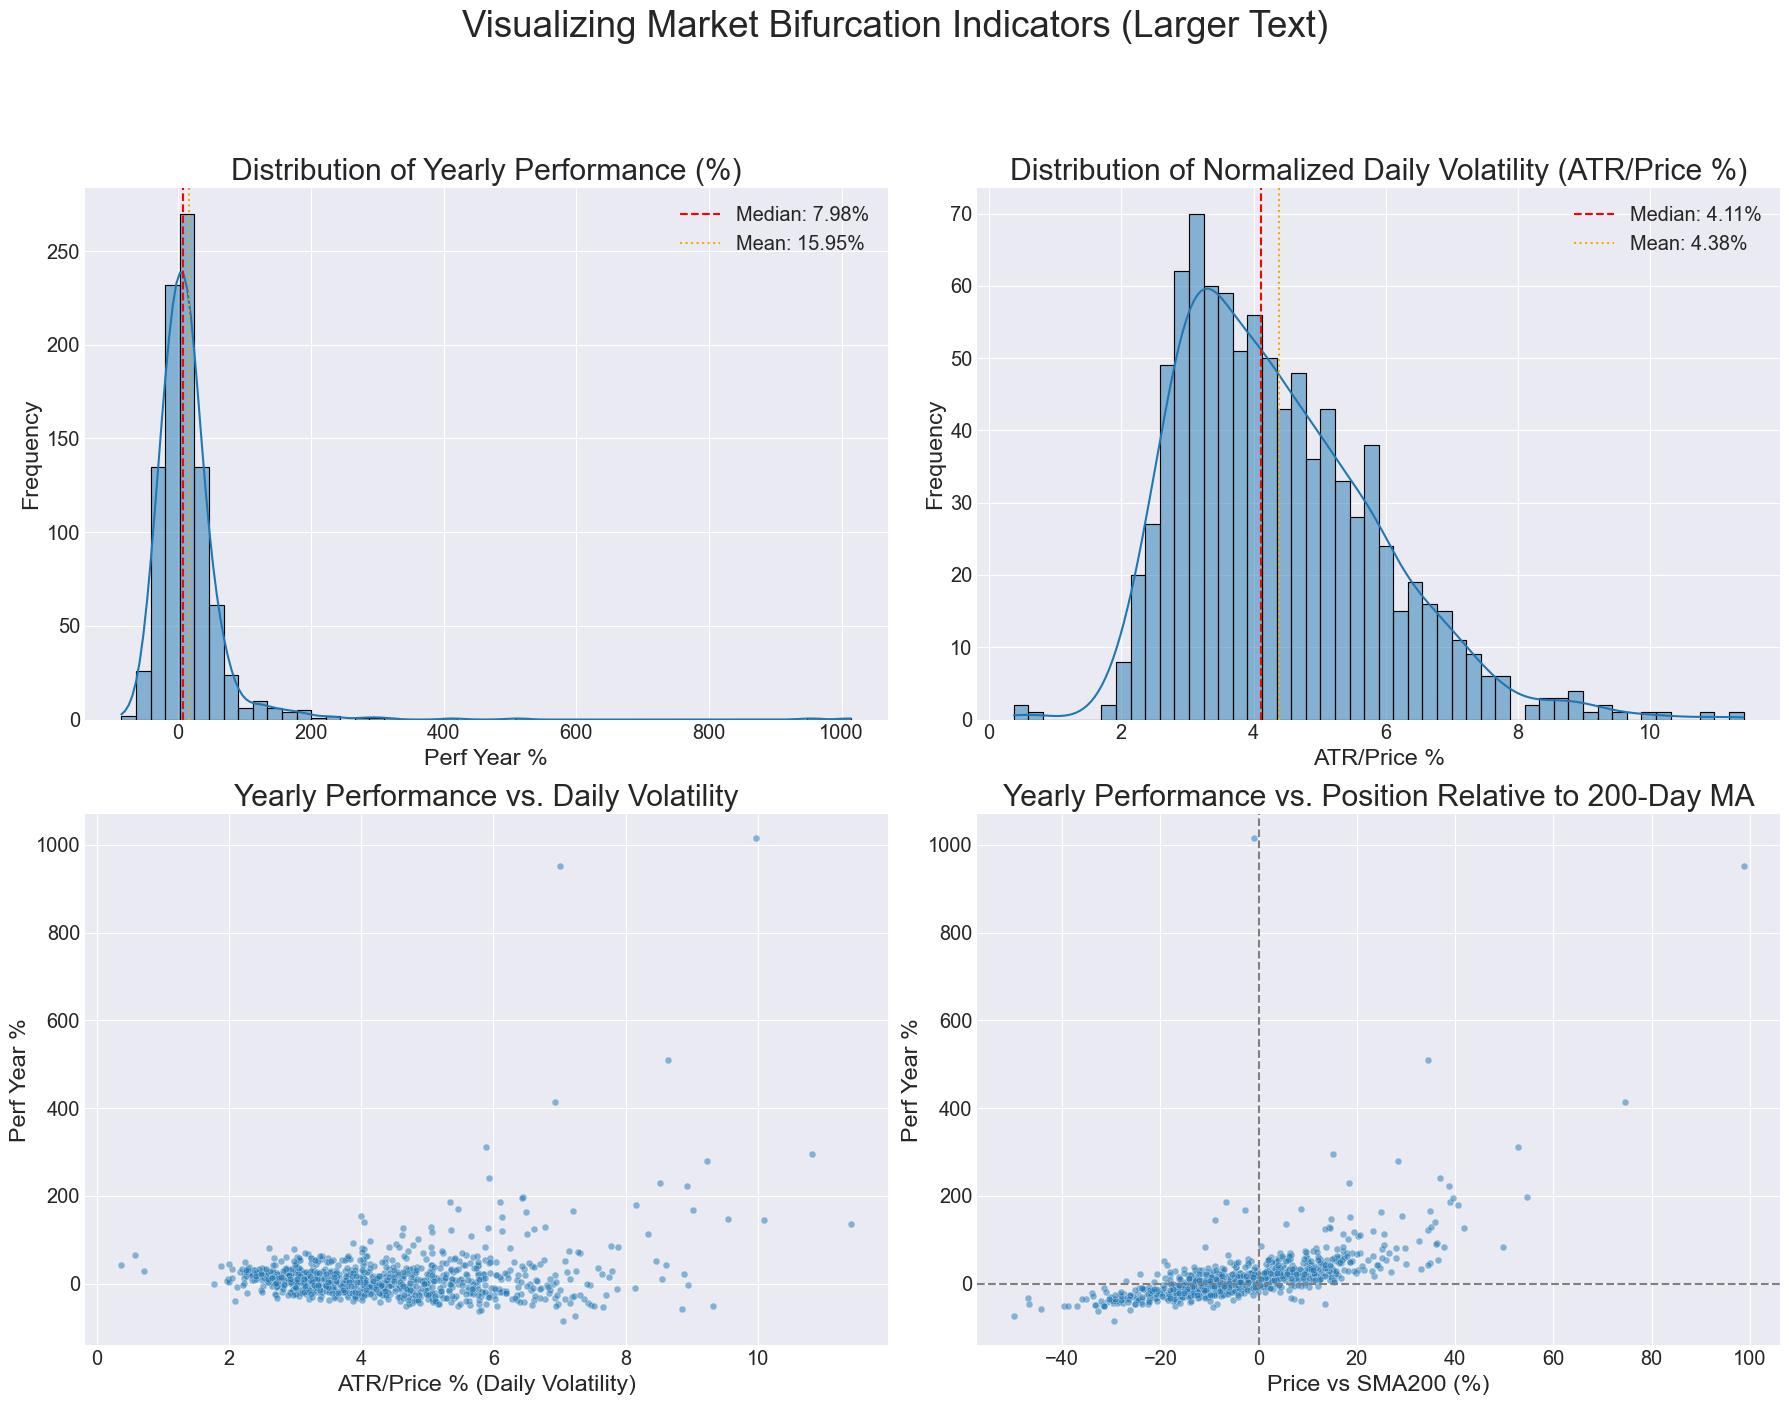

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Will be used if we need to handle potential infinite values if any

# --- IMPORTANT ---
# Ensure your DataFrame is named df_data and contains the columns used below.
# Example: (replace this with your actual data loading)
# df_data = pd.read_csv('your_market_data.csv')

# --- Data Cleaning (Optional but Recommended) ---
# Replace potential infinite values with NaN
df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use a copy to avoid modifying original if needed later
df_plot = df_data.copy()

# --- Font Size Definitions ---
SCALE_FONTSIZE = 1.2  # Scale factor for font sizes
TITLE_FONTSIZE = 18 * SCALE_FONTSIZE
AXIS_LABEL_FONTSIZE = 14 * SCALE_FONTSIZE
TICK_LABEL_FONTSIZE = 12 * SCALE_FONTSIZE
LEGEND_FONTSIZE = 12 * SCALE_FONTSIZE
SUPTITLE_FONTSIZE = 22 * SCALE_FONTSIZE

# --- Visualization ---

plt.style.use('seaborn-v0_8-darkgrid') # Use a visually appealing style
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Increased figure size slightly for larger text
fig.suptitle('Visualizing Market Bifurcation Indicators (Larger Text)', fontsize=SUPTITLE_FONTSIZE, y=1.03) # Adjusted y position slightly

# 1. Histogram of Yearly Performance ('Perf Year %')
sns.histplot(data=df_plot, x='Perf Year %', kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of Yearly Performance (%)', fontsize=TITLE_FONTSIZE)
axes[0, 0].set_xlabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['Perf Year %'].median()
mean_val = df_plot['Perf Year %'].mean()
axes[0, 0].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 0].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 0].legend(fontsize=LEGEND_FONTSIZE)

# 2. Histogram of Normalized Volatility ('ATR/Price %')
sns.histplot(data=df_plot, x='ATR/Price %', kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribution of Normalized Daily Volatility (ATR/Price %)', fontsize=TITLE_FONTSIZE)
axes[0, 1].set_xlabel('ATR/Price %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['ATR/Price %'].median()
mean_val = df_plot['ATR/Price %'].mean()
axes[0, 1].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 1].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 1].legend(fontsize=LEGEND_FONTSIZE)

# 3. Scatter Plot: Yearly Performance vs. Normalized Volatility
sns.scatterplot(data=df_plot, x='ATR/Price %', y='Perf Year %', ax=axes[1, 0], alpha=0.5, s=25) # Slightly larger points
axes[1, 0].set_title('Yearly Performance vs. Daily Volatility', fontsize=TITLE_FONTSIZE)
axes[1, 0].set_xlabel('ATR/Price % (Daily Volatility)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

# 4. Scatter Plot: Yearly Performance vs. Distance from 200-Day MA
sns.scatterplot(data=df_plot, x='SMA200 %', y='Perf Year %', ax=axes[1, 1], alpha=0.5, s=25) # Slightly larger points
axes[1, 1].set_title('Yearly Performance vs. Position Relative to 200-Day MA', fontsize=TITLE_FONTSIZE)
axes[1, 1].set_xlabel('Price vs SMA200 (%)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
axes[1, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA200)
axes[1, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Year

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout slightly for suptitle
plt.show()

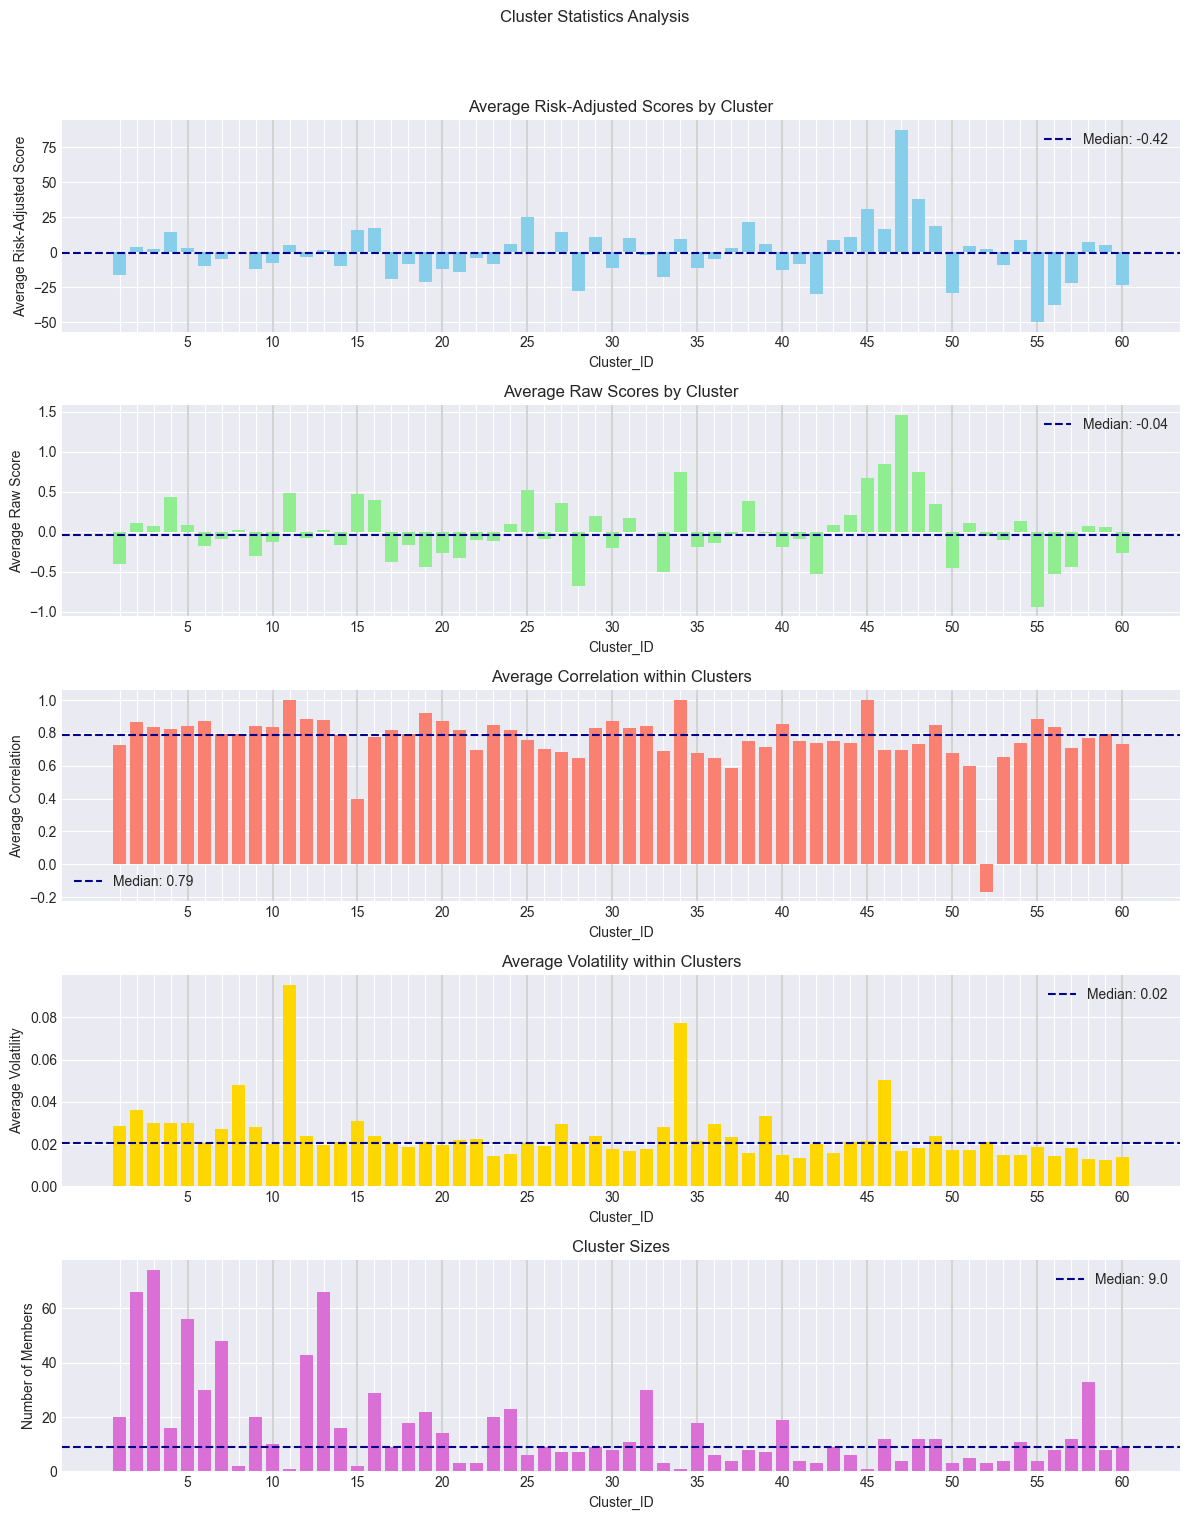

In [32]:
import matplotlib.pyplot as plt

PLOT_COLORS = ['lightgreen', 'skyblue', 'salmon', 'gold', 'orchid',
               'lightcoral', 'deepskyblue', 'mediumpurple', 'darkseagreen', 'tan']
MEDIAN_LINE_COLOR = 'red'
MEDIAN_LINE_COLOR = 'darkblue'
MEDIAN_LINE_STYLE = '--' # Dashed line for median

# --- Make Vertical Highlight Lines More Visible ---
# HIGHLIGHT_VLINE_COLOR = 'darkgray' # More visible gray
HIGHLIGHT_VLINE_COLOR = 'lightgray' # More visible gray
# HIGHLIGHT_VLINE_STYLE = '--'      # Dashed line (more visible than dotted)
HIGHLIGHT_VLINE_WIDTH = 1.5       # Slightly thicker line
# ---

# --- Calculate Medians ---
median_risk_score = cluster_stats_df['Avg_Risk_Adj_Score'].median()
median_raw_score = cluster_stats_df['Avg_Raw_Score'].median()
median_corr = cluster_stats_df['Avg_IntraCluster_Corr'].median()
median_volatility = cluster_stats_df['Avg_Volatility'].median()
median_size = cluster_stats_df['Size'].median()
# ---

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 15))
fig.suptitle('Cluster Statistics Analysis', y=1.01)

# --- Prepare Ticks and Labels ---
all_cluster_ids = cluster_stats_df['Cluster_ID'].values
tick_labels = [str(cid) if cid % 5 == 0 else '' for cid in all_cluster_ids]
highlight_positions = [cid for cid in all_cluster_ids if cid % 5 == 0] # Positions for vertical lines
# ---

# --- Plotting (Bars, Median Line, Labels, Ticks) ---
# (Code for ax1.bar, ax1.axhline, ax1.set_title, etc. remains the same as before)

# Plot 1 Average Risk-Adjusted Score
ax1.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'],
        color='skyblue', zorder=2)
ax1.axhline(median_risk_score, color=MEDIAN_LINE_COLOR, linestyle=MEDIAN_LINE_STYLE,
            label=f'Median: {median_risk_score:.2f}', zorder=3)
ax1.set_title('Average Risk-Adjusted Scores by Cluster')
ax1.set_ylabel('Average Risk-Adjusted Score')
ax1.set_xlabel('Cluster_ID')
ax1.set_xticks(all_cluster_ids)
ax1.set_xticklabels(tick_labels)
ax1.legend()

# Plot 2 Average Raw Score
ax2.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'],
        color='lightgreen', zorder=2)
ax2.axhline(median_raw_score, color=MEDIAN_LINE_COLOR, linestyle=MEDIAN_LINE_STYLE,
            label=f'Median: {median_raw_score:.2f}', zorder=3)
ax2.set_title('Average Raw Scores by Cluster')
ax2.set_ylabel('Average Raw Score')
ax2.set_xlabel('Cluster_ID')
ax2.set_xticks(all_cluster_ids)
ax2.set_xticklabels(tick_labels)
ax2.legend()

# Plot 3: Average Correlation
ax3.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_IntraCluster_Corr'],
        color='salmon', zorder=2)
ax3.axhline(median_corr, color=MEDIAN_LINE_COLOR, linestyle=MEDIAN_LINE_STYLE,
            label=f'Median: {median_corr:.2f}', zorder=3)
ax3.set_title('Average Correlation within Clusters')
ax3.set_ylabel('Average Correlation')
ax3.set_xlabel('Cluster_ID')
ax3.set_xticks(all_cluster_ids)
ax3.set_xticklabels(tick_labels)
ax3.legend()

# Plot 4: Average Volatility
ax4.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Volatility'],
        color='gold', zorder=2)
ax4.axhline(median_volatility, color=MEDIAN_LINE_COLOR, linestyle=MEDIAN_LINE_STYLE,
            label=f'Median: {median_volatility:.2f}', zorder=3)
ax4.set_title('Average Volatility within Clusters')
ax4.set_ylabel('Average Volatility')
ax4.set_xlabel('Cluster_ID')
ax4.set_xticks(all_cluster_ids)
ax4.set_xticklabels(tick_labels)
ax4.legend()

# Plot 5 Cluster Size
ax5.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Size'],
        color='orchid', zorder=2)
ax5.axhline(median_size, color=MEDIAN_LINE_COLOR, linestyle=MEDIAN_LINE_STYLE,
            label=f'Median: {median_size:.1f}', zorder=3)
ax5.set_title('Cluster Sizes')
ax5.set_ylabel('Number of Members')
ax5.set_xlabel('Cluster_ID')
ax5.set_xticks(all_cluster_ids)
ax5.set_xticklabels(tick_labels)
ax5.legend()

# --- Add MORE VISIBLE Vertical Highlight Lines to ALL axes ---
for ax in [ax1, ax2, ax3, ax4, ax5]:
    for pos in highlight_positions:
        # Use the updated style parameters
        ax.axvline(x=pos, color=HIGHLIGHT_VLINE_COLOR,
                  #  linestyle=HIGHLIGHT_VLINE_STYLE,
                   linewidth=HIGHLIGHT_VLINE_WIDTH,
                   zorder=1) # Keep zorder=1 to draw behind bars/median line
# ---

# Optional: Rotate labels slightly if they overlap
# for ax in [ax1, ax2, ax3, ax4, ax5]:
#     plt.setp(ax.get_xticklabels(), rotation=30, ha='right')


plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout
plt.show()

In [33]:
print(f'cluster_stats_df.head():\n{cluster_stats_df.head()}')
print(f'\ncluster_stats_df.describe():\n{cluster_stats_df.describe()}')

cluster_stats_df.head():
   Cluster_ID  Size  Avg_IntraCluster_Corr  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_Volatility
0           1    20                 0.7266        -0.4005            -16.5877          0.0286
1           2    66                 0.8666         0.1124              3.4307          0.0362
2           3    74                 0.8344         0.0731              2.2584          0.0302
3           4    16                 0.8234         0.4347             14.5746          0.0299
4           5    56                 0.8421         0.0815              2.7090          0.0301

cluster_stats_df.describe():
       Cluster_ID    Size  Avg_IntraCluster_Corr  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_Volatility
count     60.0000 60.0000                60.0000        60.0000             60.0000         60.0000
mean      30.5000 15.4500                 0.7632         0.0120             -0.6917          0.0243
std       17.4642 16.8839                 0.1605         0.4074             20.09

In [34]:
import pandas as pd
from typing import Optional # Optional for type hinting

def add_column_from_source(
    base_df: pd.DataFrame,
    source_df: pd.DataFrame,
    col_name_to_add: str,
    match_col_base: str = 'Ticker'
) -> pd.DataFrame:
    """
    Adds a specified column from a source DataFrame to a copy of a base DataFrame,
    matching rows based on a specified column in the base DataFrame and the *index*
    of the source DataFrame.

    Args:
        base_df (pd.DataFrame):
            The DataFrame to which the column will be added (a copy is made).
        source_df (pd.DataFrame):
            The DataFrame containing the column data to add. Its index MUST
            contain the keys for matching (e.g., Tickers corresponding to the
            values in `base_df[match_col_base]`).
        col_name_to_add (str):
            The string name of the column in `source_df` to retrieve data from.
        match_col_base (str, optional):
            The string name of the column in `base_df` containing the keys
            (e.g., Tickers) used for matching against the `source_df` index.
            Defaults to 'Ticker'.

    Returns:
        pd.DataFrame: A new DataFrame, which is a copy of `base_df` with the
                      `col_name_to_add` appended. Values are mapped based on
                      matching `base_df[match_col_base]` with `source_df.index`.
                      Returns NaN for the added column where no match is found
                      in the source index.

    Raises:
        KeyError: If `match_col_base` is not in `base_df.columns` or
                  if `col_name_to_add` is not in `source_df.columns`.
        TypeError: If mapping fails due to incompatible types or other issues.
    """
    # --- Input validation ---
    if match_col_base not in base_df.columns:
        raise KeyError(f"Matching column '{match_col_base}' not found in base_df columns: {base_df.columns.tolist()}")
    if col_name_to_add not in source_df.columns:
        raise KeyError(f"Column to add '{col_name_to_add}' not found in source_df columns: {source_df.columns.tolist()}")

    # --- Create a copy ---
    new_df = base_df.copy()

    # --- Perform the mapping ---
    # Retrieve the series to map from (the desired column in source_df)
    map_series = source_df[col_name_to_add]

    # Use the 'map' function on the matching column of the base DataFrame.
    # It looks up each value from new_df[match_col_base] in the index of map_series.
    new_df[col_name_to_add] = new_df[match_col_base].map(map_series)

    # --- Optional: Add a warning if many NaNs resulted ---
    num_nas = new_df[col_name_to_add].isna().sum()
    if num_nas > 0:
        print(f"Warning: {num_nas}/{len(new_df)} entries for '{col_name_to_add}' are NaN.")
        if num_nas == len(new_df):
             print(f"   -> Check if values in '{match_col_base}' column exist in the index of the source DataFrame.")
        else:
             print(f"   -> Check if all values in '{match_col_base}' column exist in the index of the source DataFrame.")


    return new_df



In [35]:
# Add the 'RSI' column
detailed_clusters_df_RSI = add_column_from_source(
    base_df=detailed_clusters_df,
    source_df=df_data,
    col_name_to_add='RSI',
    match_col_base='Ticker' # Explicitly state, though it's the default
)

# Add the 'RI' column
detailed_clusters_df_RSI_MktCap = add_column_from_source(
    base_df=detailed_clusters_df_RSI,
    source_df=df_data,
    col_name_to_add='MktCap, M',
    match_col_base='Ticker' # Explicitly state, though it's the default
)

print(f"=== DataFrame with RSI added ===")
print(detailed_clusters_df_RSI_MktCap.head())

=== DataFrame with RSI added ===
     Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility    Price  MktCap, M     RSI
168           1   QGEN     0.3539         21.5957      0.0164  43.0600  9310.0000 60.8400
62            1   RGEN     0.6757         19.5948      0.0345 145.2300  8150.0000 59.0300
439           1   INFY    -0.0125         -0.7694      0.0162  17.3600 72100.0000 46.9000
567           1   MRNA    -0.1500         -3.4246      0.0438  27.3900 10570.0000 47.6100
570           1   EXAS    -0.1529         -4.1048      0.0373  45.6000  8470.0000 53.5400


In [36]:
# Sort detailed_clusters_df_RSI_MktCap by Risk_Adj_Score in descending order and show top clusters
sorted_by_risk_adj = detailed_clusters_df_RSI_MktCap.sort_values('Risk_Adj_Score', ascending=False)

print(f"=== detailed_clusters_df_RSI_MktCap.head() sorted by Risk_Adj_Score ===")
print(sorted_by_risk_adj.head())
print(f"\n=== detailed_clusters_df_RSI_MktCap.tail() sorted by Risk_Adj_Score ===")
print(sorted_by_risk_adj.tail())


=== detailed_clusters_df_RSI_MktCap.head() sorted by Risk_Adj_Score ===
    Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility     Price   MktCap, M     RSI
1           47    AMX     2.5970        151.9636      0.0171   17.1000  52340.0000 76.0500
2           48   ITUB     2.5744        143.3089      0.0180    6.1400  32540.0000 72.6500
13          47     PM     1.2064         77.7932      0.0155  170.0700 264710.0000 71.1000
5           27   NFLX     1.5327         74.5831      0.0206 1096.8700 466800.0000 70.8400
6           48    SBS     1.4077         71.0397      0.0198   20.2200  13820.0000 72.7500

=== detailed_clusters_df_RSI_MktCap.tail() sorted by Risk_Adj_Score ===
     Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility    Price   MktCap, M     RSI
919           1    TMO    -1.1301        -71.3451      0.0158 426.6600 161060.0000 35.8600
902          60    KMB    -0.8683        -72.2938      0.0120 132.3400  43910.0000 38.4600
908          60    CHD    -0.9533   

In [37]:
# Sort detailed_clusters_df by Raw_Score in descending order and display
sorted_by_raw = detailed_clusters_df_RSI_MktCap.sort_values('Raw_Score', ascending=False)

# Display the sorted results
print("=== STOCKS SORTED BY RAW SCORE (TOP 15) ===")
print(sorted_by_raw[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility', 'RSI', 'MktCap, M']].head(15))

print("\n=== STOCKS SORTED BY RAW SCORE (BOTTOM 15) ===")
print(sorted_by_raw[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility', 'RSI', 'MktCap, M']].tail(15))

=== STOCKS SORTED BY RAW SCORE (TOP 15) ===
    Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility     RSI   MktCap, M
0           46   SMMT     4.0664         21.5338      0.1888 78.9900  27070.0000
1           47    AMX     2.5970        151.9636      0.0171 76.0500  52340.0000
2           48   ITUB     2.5744        143.3089      0.0180 72.6500  32540.0000
3            4   PEGA     1.8552         53.7372      0.0345 71.7900   7770.0000
4           46   BNTX     1.8467         58.4087      0.0316 72.3300  28930.0000
5           27   NFLX     1.5327         74.5831      0.0206 70.8400 466800.0000
6           48    SBS     1.4077         71.0397      0.0198 72.7500  13820.0000
7            5    DFS     1.3903         49.4449      0.0281 63.1300  47170.0000
8            2   PLTR     1.3785         30.1695      0.0457 64.8500 252780.0000
9           38     CF     1.2992         64.3067      0.0202 55.9500  12870.0000
10          48    EBR     1.2912         65.3495      0.0198 67.9

In [38]:
# Filter sorted_by_raw for specified conditions
filtered_stocks = sorted_by_raw[
  (sorted_by_raw['Raw_Score'] >= 2) & 
  (sorted_by_raw['Risk_Adj_Score'] >= 100) &
  (sorted_by_raw['RSI'] >= 70)
]

# Display the filtered results
print("=== HIGH PERFORMING STOCKS (Raw_Score >= 2 AND Risk_Adj_Score >= 100) ===")
print(filtered_stocks[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility', 'Price', 'MktCap, M', 'RSI']].to_string())

=== HIGH PERFORMING STOCKS (Raw_Score >= 2 AND Risk_Adj_Score >= 100) ===
   Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility   Price  MktCap, M     RSI
1          47    AMX     2.5970        151.9636      0.0171 17.1000 52340.0000 76.0500
2          48   ITUB     2.5744        143.3089      0.0180  6.1400 32540.0000 72.6500


In [39]:
# Sort by 'RSI', then 'Risk_Adj_Score', then 'Raw_Score'
# Default is ascending order (lowest to highest)
# Use na_position='last' (default) or 'first' to control NaN placement
detailed_clusters_df_RSI_MktCap_sorted = detailed_clusters_df_RSI_MktCap.sort_values(
    by=['RSI', 'Risk_Adj_Score', 'Raw_Score'],
    ascending=[False, False, False], # Explicitly stating ascending for clarity
    na_position='last'           # Put NaN RSI values at the end
)

# Display the head of the sorted DataFrame
print("\n=== detatiled_clusters_df_RSI.head(100) (Descending by RSI, Risk_Adj_Score, Raw_Score) ===")
print(detailed_clusters_df_RSI_MktCap_sorted.head(100)) # Use detailed_clusters_df_RSI_MktCap if you used inplace=False

print("\n=== detatiled_clusters_df_RSI.tail(100) (Descending by RSI, Risk_Adj_Score, Raw_Score) ===")
print(detailed_clusters_df_RSI_MktCap_sorted.tail(100)) # Use detailed_clusters_df_RSI_MktCap if you used inplace=False




=== detatiled_clusters_df_RSI.head(100) (Descending by RSI, Risk_Adj_Score, Raw_Score) ===
     Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility     Price   MktCap, M     RSI
0            46   SMMT     4.0664         21.5338      0.1888   36.7000  27070.0000 78.9900
1            47    AMX     2.5970        151.9636      0.0171   17.1000  52340.0000 76.0500
6            48    SBS     1.4077         71.0397      0.0198   20.2200  13820.0000 72.7500
2            48   ITUB     2.5744        143.3089      0.0180    6.1400  32540.0000 72.6500
4            46   BNTX     1.8467         58.4087      0.0316  120.5400  28930.0000 72.3300
3             4   PEGA     1.8552         53.7372      0.0345   91.3400   7770.0000 71.7900
13           47     PM     1.2064         77.7932      0.0155  170.0700 264710.0000 71.1000
5            27   NFLX     1.5327         74.5831      0.0206 1096.8700 466800.0000 70.8400
23           25   SAIC     0.9722         46.4145      0.0209  122.1600   5830.0

### ======================================

### AI code to verify calculation

In [41]:
TARGET_TICKER = 'AAPL'

print(f"\n=== TARGET TICKER: {TARGET_TICKER} ===")
zscore_df.loc[TARGET_TICKER]


=== TARGET TICKER: AAPL ===


weighted_sharpe                        0.0042
weighted_sortino                      -0.0088
weighted_omega                        -0.0100
weighted_momentum                      0.0386
weighted_sma                          -0.0375
weighted_volatility                    0.0103
weighted_rsi                           0.0000
sharpe_zscores_Sharpe 3d              -0.0552
sharpe_zscores_Sharpe 5d               0.3408
sharpe_zscores_Sharpe 10d              0.1966
sharpe_zscores_Sharpe 15d              0.1289
sharpe_zscores_Sharpe 30d             -0.0802
sharpe_zscores_Sharpe 60d             -0.4064
sortino_zscores_Sortino 3d             0.7114
sortino_zscores_Sortino 5d            -0.2677
sortino_zscores_Sortino 10d           -0.0831
sortino_zscores_Sortino 15d            0.0196
sortino_zscores_Sortino 30d           -0.1594
sortino_zscores_Sortino 60d           -0.4839
omega_zscores_Omega 3d                 0.7114
omega_zscores_Omega 5d                -0.2675
omega_zscores_Omega 10d           

In [42]:
def calculate_weighted_sharpe_minimal(df_clean_input, ticker, sharpe_cols, weight):
    """
    Calculates the weighted Sharpe score for a specific ticker, assuming
    the input DataFrame is already cleaned and prepared appropriately
    (equivalent to df_clean from the original script).

    Args:
        df_clean_input (pd.DataFrame): The DataFrame after initial cleaning
                                      (numeric conversion & dropna) from the
                                      original script run. MUST be the exact
                                      same data state used for Z-score calculation.
        ticker (str): The target ticker symbol (e.g., 'FLOT').
        sharpe_cols (list): List of Sharpe column names to use.
        weight (float): The feature weight for the Sharpe component.

    Returns:
        float: The calculated weighted_sharpe score.
    """
    # 1. Select Sharpe data (from the already cleaned DataFrame)
    #    Also filters to ensure only columns present in the df are used
    valid_sharpe_cols = [col for col in sharpe_cols if col in df_clean_input.columns]
    if not valid_sharpe_cols:
        raise ValueError("None of the specified Sharpe columns found in the input DataFrame.")
    sharpe_data = df_clean_input[valid_sharpe_cols]

    # 2. Calculate dataset means and standard deviations
    #    These are calculated across all tickers in df_clean_input
    means = sharpe_data.mean() # skipna=True by default
    stds = sharpe_data.std()   # skipna=True by default
    print(f'dataset means: {means.to_dict()}')
    print(f'dataset stds: {stds.to_dict()}')

    # 3. Get the specific ticker's Sharpe values
    ticker_sharpe_values = sharpe_data.loc[ticker]
    print(f'ticker_sharpe_values for {ticker}: {ticker_sharpe_values.to_dict()}')

    # 4. Calculate Z-scores for the ticker
    z_scores = {}
    for col in valid_sharpe_cols:
        mean_val = means[col]
        std_val = stds[col]
        ticker_val = ticker_sharpe_values[col]

        # Handle cases with NaN or zero/tiny standard deviation for the column
        if pd.isna(std_val) or std_val < 1e-9:
            z_score = 0.0
        elif pd.isna(ticker_val): # If the specific ticker value is NaN (shouldn't happen if df_clean ok)
             z_score = 0.0 # Treat as average
             # Or handle differently if needed, e.g., raise error or skip
        else:
            z_score = (ticker_val - mean_val) / std_val
        z_scores[col] = z_score

    ticker_z_score_series = pd.Series(z_scores)
    print(f'ticker_z_score_series for {ticker}: {ticker_z_score_series.to_dict()}')

    # 5. Average the ticker's Z-scores
    average_z_score = ticker_z_score_series.mean()
    print(f'Average Z-Score for {ticker}: {average_z_score:.6f}')

    # 6. Apply the overall weight
    weighted_sharpe = average_z_score * weight
    print(f'Weighted Sharpe Score for {ticker}: {weighted_sharpe:.6f}\n')

    return weighted_sharpe

# --- Parameters (match your original script) ---
time_horizons = [3, 5, 10, 15, 30, 60]
sharpe_cols_definition = [f'Sharpe {days}d' for days in time_horizons]
sharpe_feature_weight = 0.20
# sortino_cols_definition = [f'Sortino {days}d' for days in time_horizons]
# sortino_feature_weight = 0.20
# omega_cols_definition = [f'Omega {days}d' for days in time_horizons]
# omega_feature_weight = 0.15

# --- Run the minimal calculation ---
try:
    final_weighted_sharpe = calculate_weighted_sharpe_minimal(
        df_data,
        TARGET_TICKER,
        sharpe_cols=sharpe_cols_definition,
        weight=sharpe_feature_weight,
    )

    # --- Output the result ---
    print(f'time_horizons: {time_horizons}')
    print(f'sharpe_cols_definition: {sharpe_cols_definition}')
    print(f'Ticker: {TARGET_TICKER}, Weighted Sharpe Score: {final_weighted_sharpe:.6f}')

except (KeyError, ValueError) as e:
     print(f"Error during minimal calculation: {e}")
     print("Check if the ticker exists and Sharpe columns are present in the loaded df_clean_input.")

dataset means: {'Sharpe 3d': 164.90445442200297, 'Sharpe 5d': 6.5286035188771026, 'Sharpe 10d': 5.437007400889813, 'Sharpe 15d': 0.5957354872255262, 'Sharpe 30d': 0.3072628204882397, 'Sharpe 60d': -0.3693741681719761}
dataset stds: {'Sharpe 3d': 1525.2870454311794, 'Sharpe 5d': 9.100693369752944, 'Sharpe 10d': 4.188011882983091, 'Sharpe 15d': 2.0592836552977962, 'Sharpe 30d': 1.5376656249918503, 'Sharpe 60d': 1.4519364067091345}
ticker_sharpe_values for AAPL: {'Sharpe 3d': 80.6701047670726, 'Sharpe 5d': 9.629987742994828, 'Sharpe 10d': 6.260220403403828, 'Sharpe 15d': 0.8612002910788711, 'Sharpe 30d': 0.18400253016543278, 'Sharpe 60d': -0.9593856391714817}
ticker_z_score_series for AAPL: {'Sharpe 3d': -0.05522524426287144, 'Sharpe 5d': 0.34078548722732305, 'Sharpe 10d': 0.19656415156292395, 'Sharpe 15d': 0.12891123725009881, 'Sharpe 30d': -0.08016065932634751, 'Sharpe 60d': -0.40636178573191617}
Average Z-Score for AAPL: 0.020752
Weighted Sharpe Score for AAPL: 0.004150

time_horizons:

In [43]:
import pandas as pd
import numpy as np

def calculate_weighted_momentum_minimal(df_clean_input, ticker, momentum_cols, decay_weights, feature_weight):
    """
    Calculates the weighted momentum score for a specific ticker, assuming
    the input DataFrame is already cleaned and prepared appropriately
    (equivalent to df_clean from the original script).

    Args:
        df_clean_input (pd.DataFrame): The DataFrame after initial cleaning
                                      (numeric conversion & dropna) from the
                                      original script run. MUST be the exact
                                      same data state used for Z-score calculation.
        ticker (str): The target ticker symbol.
        momentum_cols (list): List of momentum column names to use.
        decay_weights (np.array): NumPy array of decay weights corresponding
                                  exactly to momentum_cols.
        feature_weight (float): The overall feature weight for the momentum component.

    Returns:
        float: The calculated weighted_momentum score.
    """
    # 1. Select Momentum data (from the already cleaned DataFrame)
    #    Filter to ensure only columns present in the df are used
    valid_momentum_cols = [col for col in momentum_cols if col in df_clean_input.columns]
    if not valid_momentum_cols:
        raise ValueError("None of the specified momentum columns found in the input DataFrame.")

    # Adjust decay weights if some columns were missing (mimics original logic slightly)
    if len(valid_momentum_cols) != len(momentum_cols):
        print(f"Warning: Using a subset of momentum columns: {valid_momentum_cols}")
        valid_indices = [i for i, col in enumerate(momentum_cols) if col in valid_momentum_cols]
        effective_decay_weights = decay_weights[valid_indices]
        # Optional: Re-normalize weights? The original didn't explicitly,
        # so we won't here for direct comparison.
        # effective_decay_weights = effective_decay_weights / np.sum(effective_decay_weights)
    else:
        effective_decay_weights = decay_weights # Use the original weights

    if len(valid_momentum_cols) != len(effective_decay_weights):
        raise ValueError(f"Mismatch between valid momentum columns ({len(valid_momentum_cols)}) and effective decay weights ({len(effective_decay_weights)}) after filtering.")

    momentum_data = df_clean_input[valid_momentum_cols]

    # 2. Impute NaNs within component (using means from df_clean_input)
    #    This step happens *before* Z-scoring in the original _calculate_component_scores
    imputed_momentum_data = momentum_data.copy()
    means_for_impute = imputed_momentum_data.mean()
    for col in valid_momentum_cols:
         if imputed_momentum_data[col].isna().any():
              imputed_momentum_data[col] = imputed_momentum_data[col].fillna(means_for_impute[col])


    # 3. Calculate dataset means and standard deviations (from imputed data)
    means = imputed_momentum_data.mean() # skipna=True by default
    stds = imputed_momentum_data.std()   # skipna=True by default
    print(f'dataset means: {means.to_dict()}')
    print(f'dataset stds: {stds.to_dict()}')

    # 4. Calculate Z-Scores DataFrame
    z_scores_df = pd.DataFrame(index=imputed_momentum_data.index)
    for col in valid_momentum_cols:
        mean_val = means[col]
        std_val = stds[col]
        if pd.isna(std_val) or std_val < 1e-9:
             z_scores_df[col] = 0.0
        else:
             # Apply Z-score formula vectorized
             z_scores_df[col] = (imputed_momentum_data[col] - mean_val) / std_val
    print(f'z_scores_df:\n{z_scores_df}')


    # 5. Get the specific ticker's Z-scores
    ticker_z_scores = z_scores_df.loc[ticker] # This is now a Series
    print(f'ticker_z_scores for {ticker}: {ticker_z_scores.to_dict()}')

    # 6. Apply decay weights (Weighted Average using dot product)
    #    Ensure the Series and weights align (they should based on valid_momentum_cols)
    weighted_avg_z_score = ticker_z_scores @ effective_decay_weights # Dot product
    print(f'Weighted Average Z-Score for {ticker}: {weighted_avg_z_score:.6f}')

    # 7. Apply the overall feature weight
    weighted_momentum = weighted_avg_z_score * feature_weight
    print(f'Weighted Momentum Score for {ticker}: {weighted_momentum:.6f}\n')

    return weighted_momentum

# --- Parameters (match your original script) ---
# TARGET_TICKER = 'FLOT' # Example Ticker
momentum_cols_definition = ['Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %']
# Ensure this matches column_definitions['momentum_weights'] and is a NumPy array
momentum_decay_weights_definition = np.array([0.4, 0.3, 0.2, 0.1])
momentum_feature_weight = 0.20 # From feature_weights['momentum']


# --- Run the minimal calculation ---
try:
    final_weighted_momentum = calculate_weighted_momentum_minimal(
        # df_clean_loaded,
        df_data,
        TARGET_TICKER,
        momentum_cols_definition,
        momentum_decay_weights_definition,
        momentum_feature_weight
    )

    # --- Output the result ---
    print(f'final_weighted_momentum for {TARGET_TICKER}: {final_weighted_momentum:.6f}')

except (KeyError, ValueError) as e:
     print(f"Error during minimal calculation: {e}")
     print("Check if the ticker exists and momentum columns are present in the loaded df_clean_input.")
except Exception as e:
     print(f"An unexpected error occurred: {e}")

dataset means: {'Perf 3D %': 6.220870509538808, 'Perf Week %': 4.924800431499461, 'Perf Month %': -4.2897626752966564, 'Perf Quart %': -6.903905070118663}
dataset stds: {'Perf 3D %': 5.3104459596549765, 'Perf Week %': 5.426539707260109, 'Perf Month %': 8.46107471050759, 'Perf Quart %': 16.33140441796469}
z_scores_df:
        Perf 3D %  Perf Week %  Perf Month %  Perf Quart %
Ticker                                                    
AAPL       0.3114       0.4303       -0.3050        0.0039
MSFT       0.3062      -0.1299        0.2718       -0.3916
NVDA       0.6784      -0.5648       -0.8900       -1.2740
AMZN       0.9916       0.3824       -0.5945       -0.8484
GOOGL      0.3091      -0.1925       -0.2742       -0.7743
...           ...          ...           ...           ...
HR        -0.9901      -0.8725       -0.0922        0.0602
HOMB      -0.0983       0.3972        0.2293       -0.0298
JXN        0.3962       0.3124       -1.1311       -0.7890
BPMC      -0.7442      -0.0138  

In [44]:
import pandas as pd
import numpy as np

def calculate_weighted_sma_minimal(df_clean_input, ticker, sma_cols, feature_weight):
    """
    Calculates the weighted SMA score for a specific ticker, assuming
    the input DataFrame is already cleaned and prepared appropriately
    (equivalent to df_clean from the original script).

    Args:
        df_clean_input (pd.DataFrame): The DataFrame after initial cleaning
                                      (numeric conversion & dropna) from the
                                      original script run. MUST be the exact
                                      same data state used for Z-score calculation.
        ticker (str): The target ticker symbol.
        sma_cols (list): List of SMA column names to use (e.g., ['SMA20 %', 'SMA50 %', 'SMA200 %']).
        feature_weight (float): The overall feature weight for the SMA component.

    Returns:
        float: The calculated weighted_sma score.
    """
    # 1. Select SMA data (from the already cleaned DataFrame)
    #    Filter to ensure only columns present in the df are used
    valid_sma_cols = [col for col in sma_cols if col in df_clean_input.columns]
    if not valid_sma_cols:
        raise ValueError("None of the specified SMA columns found in the input DataFrame.")

    sma_data = df_clean_input[valid_sma_cols]

    # 2. Impute NaNs within component (using means from df_clean_input for the component)
    #    This step happens *before* Z-scoring in the original _calculate_component_scores
    imputed_sma_data = sma_data.copy()
    means_for_impute = imputed_sma_data.mean()
    for col in valid_sma_cols:
         if imputed_sma_data[col].isna().any():
              imputed_sma_data[col] = imputed_sma_data[col].fillna(means_for_impute[col])

    # 3. Calculate dataset means and standard deviations (from imputed data)
    means = imputed_sma_data.mean() # skipna=True by default
    stds = imputed_sma_data.std()   # skipna=True by default
    print(f'dataset means: {means.to_dict()}')
    print(f'dataset stds: {stds.to_dict()}')

    # 4. Calculate Z-Scores DataFrame for SMA columns
    z_scores_df = pd.DataFrame(index=imputed_sma_data.index)
    for col in valid_sma_cols:
        mean_val = means[col]
        std_val = stds[col]
        if pd.isna(std_val) or std_val < 1e-9:
             z_scores_df[col] = 0.0
        else:
             # Apply Z-score formula vectorized
             z_scores_df[col] = (imputed_sma_data[col] - mean_val) / std_val
    print(f'z_scores_df:\n{z_scores_df}')

    # 5. Get the specific ticker's Z-scores
    ticker_z_scores = z_scores_df.loc[ticker] # This is now a Series
    print(f'ticker_z_scores for {ticker}: {ticker_z_scores.to_dict()}')

    # 6. Average the ticker's Z-scores (Simple Mean for SMA)
    average_z_score = ticker_z_scores.mean()
    print(f'Average Z-Score for {ticker}: {average_z_score:.6f}')

    # 7. Apply the overall feature weight
    weighted_sma = average_z_score * feature_weight
    print(f'Weighted SMA Score for {ticker}: {weighted_sma:.6f}\n')

    return weighted_sma

# --- Parameters (match your original script) ---
# TARGET_TICKER = 'FLOT' # Example Ticker
sma_cols_definition = ['SMA20 %', 'SMA50 %', 'SMA200 %']
sma_feature_weight = 0.15 # From feature_weights['sma']

# --- Run the minimal calculation ---
try:
    final_weighted_sma = calculate_weighted_sma_minimal(
        df_data,
        TARGET_TICKER,
        sma_cols_definition,
        sma_feature_weight
    )

    # --- Output the result ---
    # print(f"{final_weighted_sma:.6f}")
    print(f'Ticker: {TARGET_TICKER}, Weighted SMA Score: {final_weighted_sma:.6f}')

except (KeyError, ValueError) as e:
     print(f"Error during minimal calculation: {e}")
     print("Check if the ticker exists and SMA columns are present in the loaded df_clean_input.")
except Exception as e:
     print(f"An unexpected error occurred: {e}")

dataset means: {'SMA20 %': 2.8570765911542613, 'SMA50 %': -2.0177238403452, 'SMA200 %': -2.9515102481121898}
dataset stds: {'SMA20 %': 5.099424900615913, 'SMA50 %': 7.3581255901290055, 'SMA200 %': 15.215303988763008}
z_scores_df:
        SMA20 %  SMA50 %  SMA200 %
Ticker                            
AAPL     0.0300  -0.4162   -0.3647
MSFT     0.0418   0.2647   -0.2549
NVDA    -0.3563  -0.8089   -0.8122
AMZN    -0.0779  -0.4705   -0.2260
GOOGL    0.1418  -0.1675   -0.3068
...         ...      ...       ...
HR      -0.8623  -0.2748   -0.3719
HOMB     0.2986   0.1533    0.1112
JXN     -0.4250  -0.6907   -0.7406
BPMC    -0.1269  -0.1104   -0.4015
VRNA     1.3027   0.7186    3.6635

[927 rows x 3 columns]
ticker_z_scores for AAPL: {'SMA20 %': 0.02998836375201217, 'SMA50 %': -0.41617612014707556, 'SMA200 %': -0.36466506065114107}
Average Z-Score for AAPL: -0.250284
Weighted SMA Score for AAPL: -0.037543

Ticker: AAPL, Weighted SMA Score: -0.037543


In [45]:
import pandas as pd
import numpy as np

def calculate_weighted_volatility_minimal(df_clean_input, ticker, volatility_cols, feature_weight):
    """
    Calculates the weighted volatility score for a specific ticker, assuming
    the input DataFrame is already cleaned and prepared appropriately
    (equivalent to df_clean from the original script).

    Args:
        df_clean_input (pd.DataFrame): The DataFrame after initial cleaning
                                      (numeric conversion & dropna) from the
                                      original script run. MUST be the exact
                                      same data state used for Z-score calculation.
        ticker (str): The target ticker symbol.
        volatility_cols (list): List of volatility column names that were *actually used*
                                in the original script's calculation (dynamic list).
        feature_weight (float): The overall feature weight for the volatility component
                                (usually negative).

    Returns:
        float: The calculated weighted_volatility score.
    """
    # 1. Select Volatility data (from the already cleaned DataFrame)
    #    Filter to ensure only columns specified AND present in the df are used
    valid_volatility_cols = [col for col in volatility_cols if col in df_clean_input.columns]
    if not valid_volatility_cols:
        # Check if the original list was empty vs columns missing from df_clean
        if not volatility_cols:
             print("Note: No volatility columns were specified as input.")
             return 0.0 # Return 0 if no columns were meant to be used
        else:
             raise ValueError(f"None of the specified volatility columns {volatility_cols} found in the input DataFrame.")

    volatility_data = df_clean_input[valid_volatility_cols]
    print(f'Using volatility columns: {valid_volatility_cols}')
    print(f'volatility_data:\n{volatility_data}')

    # 2. Impute NaNs within component (using means from df_clean_input for the component)
    #    This step happens *before* Z-scoring in the original _calculate_component_scores
    imputed_volatility_data = volatility_data.copy()
    means_for_impute = imputed_volatility_data.mean()
    for col in valid_volatility_cols:
         if imputed_volatility_data[col].isna().any():
              imputed_volatility_data[col] = imputed_volatility_data[col].fillna(means_for_impute[col])

    # 3. Calculate dataset means and standard deviations (from imputed data)
    means = imputed_volatility_data.mean() # skipna=True by default
    stds = imputed_volatility_data.std()   # skipna=True by default
    print(f'dataset means: {means.to_dict()}')
    print(f'dataset stds: {stds.to_dict()}')

    # 4. Calculate Z-Scores DataFrame for Volatility columns
    z_scores_df = pd.DataFrame(index=imputed_volatility_data.index)
    for col in valid_volatility_cols:
        mean_val = means[col]
        std_val = stds[col]
        if pd.isna(std_val) or std_val < 1e-9:
             z_scores_df[col] = 0.0
        else:
             # Apply Z-score formula vectorized
             z_scores_df[col] = (imputed_volatility_data[col] - mean_val) / std_val
    print(f'z_scores_df:\n{z_scores_df}')

    # 5. Get the specific ticker's Z-scores
    ticker_z_scores = z_scores_df.loc[ticker] # This is now a Series
    print(f'ticker_z_scores for {ticker}: {ticker_z_scores.to_dict()}')

    # 6. Average the ticker's Z-scores (Simple Mean for Volatility)
    # Handle case where ticker_z_scores might be empty if valid_volatility_cols was empty
    if ticker_z_scores.empty:
         average_z_score = 0.0
    else:
        average_z_score = ticker_z_scores.mean()
    print(f'Average Z-Score for {ticker}: {average_z_score:.6f}')    

    # 7. Apply the overall feature weight (often negative for volatility)
    weighted_volatility = average_z_score * feature_weight
    print(f'Weighted Volatility Score for {ticker}: {weighted_volatility:.6f}\n')

    return weighted_volatility

# --- Parameters (match your original script) ---
# TARGET_TICKER = 'FLOT' # Example Ticker

# !!! CRITICAL PARAMETER !!!
volatility_cols_used_in_original_run = ['Volatility W %', 'Volatility M %', 'ATR/Price %']
volatility_feature_weight = -0.10 # From feature_weights['volatility']

# --- Run the minimal calculation ---
try:
    final_weighted_volatility = calculate_weighted_volatility_minimal(
        df_data,
        TARGET_TICKER,
        volatility_cols_used_in_original_run, # Use the critical parameter defined above
        volatility_feature_weight
    )

    # --- Output the result ---
    # Note: This value is often negative because the weight is negative.
    print(f'Ticker: {TARGET_TICKER}, Weighted Volatility Score: {final_weighted_volatility:.6f}')

except (KeyError, ValueError) as e:
     print(f"Error during minimal calculation: {e}")
     print("Check if the ticker exists and the specified volatility columns are present in the loaded df_clean_input.")
except Exception as e:
     print(f"An unexpected error occurred: {e}")

Using volatility columns: ['Volatility W %', 'Volatility M %', 'ATR/Price %']
volatility_data:
        Volatility W %  Volatility M %  ATR/Price %
Ticker                                             
AAPL            2.5400          4.9500       4.6552
MSFT            2.4400          3.5100       3.3462
NVDA            3.5400          6.4400       6.4549
AMZN            3.4200          5.2500       5.0820
GOOGL           2.6800          3.8400       3.6791
...                ...             ...          ...
HR              2.2500          3.1200       2.9243
HOMB            2.9200          3.9100       3.5945
JXN             3.6800          6.0900       5.8654
BPMC            3.0800          5.1600       4.6347
VRNA            4.5600          7.2900       5.8814

[927 rows x 3 columns]
dataset means: {'Volatility W %': 3.35747572815534, 'Volatility M %': 4.644617044228694, 'ATR/Price %': 4.3776303162532795}
dataset stds: {'Volatility W %': 1.210766537451186, 'Volatility M %': 1.665035636

In [46]:
import pandas as pd
import numpy as np

def calculate_weighted_rsi_minimal(df_clean_input, ticker):
    """
    Calculates the weighted RSI score for a specific ticker based on its
    raw RSI value, assuming the input DataFrame is already cleaned and
    prepared appropriately (equivalent to df_clean from the original script).

    Args:
        df_clean_input (pd.DataFrame): The DataFrame after initial cleaning
                                      (numeric conversion & dropna) from the
                                      original script run. MUST contain the 'RSI' column.
        ticker (str): The target ticker symbol.

    Returns:
        float: The calculated weighted_rsi score.
    """
    # 1. Check if 'RSI' column exists
    if 'RSI' not in df_clean_input.columns:
        raise ValueError("The 'RSI' column is missing from the input DataFrame.")

    # 2. Get the specific ticker's Raw RSI value
    try:
        rsi_value = df_clean_input.loc[ticker, 'RSI']
    except KeyError:
        raise KeyError(f"Ticker '{ticker}' not found in the input DataFrame index.")
    print(f'Ticker: {ticker}, Raw RSI Value: {rsi_value}')

    # 3. Handle potential NaN RSI value
    if pd.isna(rsi_value):
        # Original code's np.select default and final .fillna(0) results in 0 for NaN
        return 0.0

    # 4. Apply the conditional RSI scoring logic
    if rsi_value > 70:
        # Overbought penalty
        rsi_score = np.clip((rsi_value - 70) * -0.01, a_min=-0.15, a_max=0)
        print(f'Overbought condition for {ticker}: RSI {rsi_value} results in score {rsi_score:.6f}')
    elif rsi_value < 30:
        # Oversold reward
        rsi_score = np.clip((30 - rsi_value) * 0.005, a_min=0, a_max=0.075)
        print(f'Oversold condition for {ticker}: RSI {rsi_value} results in score {rsi_score:.6f}')
    else: # 30 <= rsi_value <= 70
        # Neutral zone
        rsi_score = 0.0
        print(f'Neutral condition for {ticker}: RSI {rsi_value} results in score {rsi_score:.6f}')
    print(f'Calculated RSI Score for {ticker}: {rsi_score:.6f}')    

    return rsi_score

# --- Parameters ---
# TARGET_TICKER = 'HRB' # Example Ticker

# --- Run the minimal calculation ---
try:
    final_weighted_rsi = calculate_weighted_rsi_minimal(
        df_data,
        TARGET_TICKER
    )

    # --- Output the result ---
    # This score represents the adjustment based on RSI conditions.
    print(f"{final_weighted_rsi:.6f}")

except (KeyError, ValueError) as e:
     print(f"Error during minimal calculation: {e}")
     print("Check if the ticker exists and the 'RSI' column is present in the loaded df_clean_input.")
except Exception as e:
     print(f"An unexpected error occurred: {e}")

Ticker: AAPL, Raw RSI Value: 51.38
Neutral condition for AAPL: RSI 51.38 results in score 0.000000
Calculated RSI Score for AAPL: 0.000000
0.000000


In [47]:
component_column_names = [
  'weighted_sharpe',
  'weighted_sortino',
  'weighted_omega',
  'weighted_momentum',
  'weighted_sma',
  'weighted_volatility',
  'weighted_rsi'
]

In [48]:
import pandas as pd
import numpy as np

def calculate_composite_score_minimal(component_scores_ticker):
    """
    Calculates the composite score by summing the individual weighted component
    scores provided for a specific ticker.

    Args:
        component_scores_ticker (pd.Series): A Series containing the individual
                                            weighted component scores for the
                                            target ticker (e.g., index =
                                            ['weighted_sharpe', 'weighted_momentum', ...],
                                            values = scores).

    Returns:
        float: The calculated composite score (sum of components).
    """
    # The core logic is simply summing the provided component scores
    composite_score = component_scores_ticker.sum()
    return composite_score

# # --- Parameters ---
# TARGET_TICKER = 'FLOT' # Example Ticker

# --- Run the minimal calculation ---
try:
    # 2. Check if target ticker exists
    # if TARGET_TICKER not in zscore_df.index:
    if TARGET_TICKER not in zscore_df.index:
        raise KeyError(f"Target ticker '{TARGET_TICKER}' not found in the loaded zscore_df index.")

    # 3. Check if all component columns exist
    missing_cols = [col for col in component_column_names if col not in zscore_df.columns]
    if missing_cols:
        raise ValueError(f"Missing required component columns in zscore_df: {missing_cols}")

    # 4. Extract the component scores for the target ticker
    component_scores_for_ticker = zscore_df.loc[TARGET_TICKER, component_column_names]

    # 5. Calculate the composite score by summing these components
    calculated_composite_score = calculate_composite_score_minimal(component_scores_for_ticker)

    # --- Output the result ---
    print(f"Calculated Composite Score, i.e. Raw_Score, for {TARGET_TICKER} (Sum of Components): {calculated_composite_score:.6f}")

    # --- Verification Step ---
    # Compare with the 'composite_score' column already present in the loaded DataFrame
    original_composite_score = zscore_df.loc[TARGET_TICKER, 'composite_score']
    print(f"Original Composite Score from zscore_df: {original_composite_score:.6f}")

    # Check if they match (allowing for potential floating point inaccuracies)
    if np.isclose(calculated_composite_score, original_composite_score):
        print("Verification SUCCESS: Calculated score matches the original score.")
    else:
        print("Verification FAILED: Calculated score does NOT match the original score.")
        print(f"Difference: {calculated_composite_score - original_composite_score:.6e}")


except FileNotFoundError:
     print(f"Error: Could not find the zscore_df file. Please check the path.")
except (KeyError, ValueError) as e:
     print(f"Error during minimal calculation: {e}")
     print("Check if the ticker exists and all component columns are present in the loaded zscore_df.")
except Exception as e:
     print(f"An unexpected error occurred: {e}")

Calculated Composite Score, i.e. Raw_Score, for AAPL (Sum of Components): -0.003289
Original Composite Score from zscore_df: -0.003289
Verification SUCCESS: Calculated score matches the original score.


In [49]:
covariance_ticker = df_cov.loc[TARGET_TICKER, TARGET_TICKER]
volatility_ticker = np.sqrt(covariance_ticker) 
print(f'Covariance for {TARGET_TICKER}: {covariance_ticker:.6f}')
print(f'Volatility for {TARGET_TICKER}: {volatility_ticker:.6f}')
print(f'composite_score, i.e. Raw_Score, for {TARGET_TICKER}: {calculated_composite_score:.6f}')
print(f'Risk_Adj_Score for {TARGET_TICKER}: {calculated_composite_score / volatility_ticker:.6f}')


Covariance for AAPL: 0.000428
Volatility for AAPL: 0.020676
composite_score, i.e. Raw_Score, for AAPL: -0.003289
Risk_Adj_Score for AAPL: -0.159080
